# CASE STUDY - Logistic Regression - Lead Scoring - X Education company

# Problem Statement

- An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. There are a lot of leads generated in the initial stage but only a few of them come out as paying customers. The company needs to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc.) in order to get a higher lead conversion.


- Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 


- X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


# Business Goals and Objectives

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# 1. Data understanding, preparation and EDA

In [1]:
#Importing libraries



# Importing Pandas and NumPy
import pandas as pd
import numpy as np

# Importing matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics


import statsmodels.api as sm

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Setting Maximum displaying rows and column can help in better readability of data.
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',300)

# Reading and Understanding the Data

NOTE - Please change the directory path of the dataset in the below query as per your data availability


In [3]:
# loading CSV data into Dataframe using Pandas library (from Local machine)

xdf=pd.read_csv(r"Leads.csv",sep = ',',encoding = "ISO-8859-1")

xdf.head() # checking first five rows 

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
xdf_orignal=xdf.copy()
xdf_orignal.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

# Data Inspection

In [5]:
# Checking shape of data (No of rows, no of columns)

xdf.shape

(9240, 37)

In [6]:
xdf.info() #Providing information about dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Statstical information for all numerical columns which gives idea about data distribution.
xdf.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [8]:
# Checking the missing values
xdf.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# The columns having null values:
null_col1=xdf.columns[xdf.isnull().any()]
print(len(null_col1),"\n")
print(null_col1)


17 

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


# Data Cleaning and Preparation

In [10]:
#Checking Duplicate values and taking action

xdf[xdf.duplicated(keep=False)] #No Duplicate value found

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

In [11]:
# Many of the categorical variables have a level called 'Select' 
# It needs to be handled because it is as good as a null value.
# So replacing 'Select' with NaN.

xdf=xdf.replace("Select",np.nan)


In [12]:
#Checking null Values

xdf.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
# Sum of missing values very high in some columns
#Check percentage of missing values in each column. 

null_valuesp = (xdf.isnull().sum()/len(xdf))*100
null_valuesp.sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

We'll drop columns with more than 40% of missing values as it does not make sense to impute these many values. 
But the variable 'Lead Quality', which has 51.6% missing values seems promising.

In [14]:
#Treating Missing values Column "Lead Quality"

xdf["Lead Quality"].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

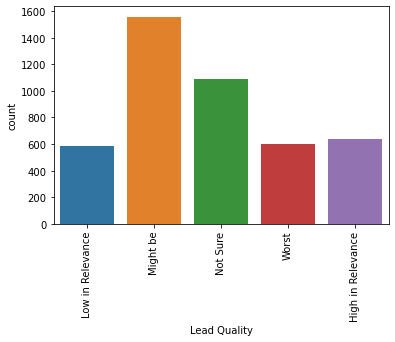

In [15]:
#Analysing frequency of values
sns.countplot(xdf["Lead Quality"])
plt.xticks(rotation=90)
plt.show()

In [16]:
# As the rating is based on the intuition of the employee based omn how the communication went. 
# Let's find out the rating having highest frequency.
xdf['Lead Quality'].mode()

0    Might be
dtype: object

In [17]:
# Null values in the 'Lead Quality' column can be imputed with the value 'Not Sure' 
# As we can assume that not filling in a column means the employee does not know or is not sure about the option.
xdf['Lead Quality'] = xdf['Lead Quality'].replace(np.nan, "Not Sure")

In [18]:
#Checking Null Values for Column "Lead Quality"
xdf['Lead Quality'].isnull().sum()

0

In [19]:
# Sum of missing values very high in some columns
#Check percentage of missing values in each column. 

null_valuesp = (xdf.isnull().sum()/len(xdf))*100
null_valuesp.sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.0000

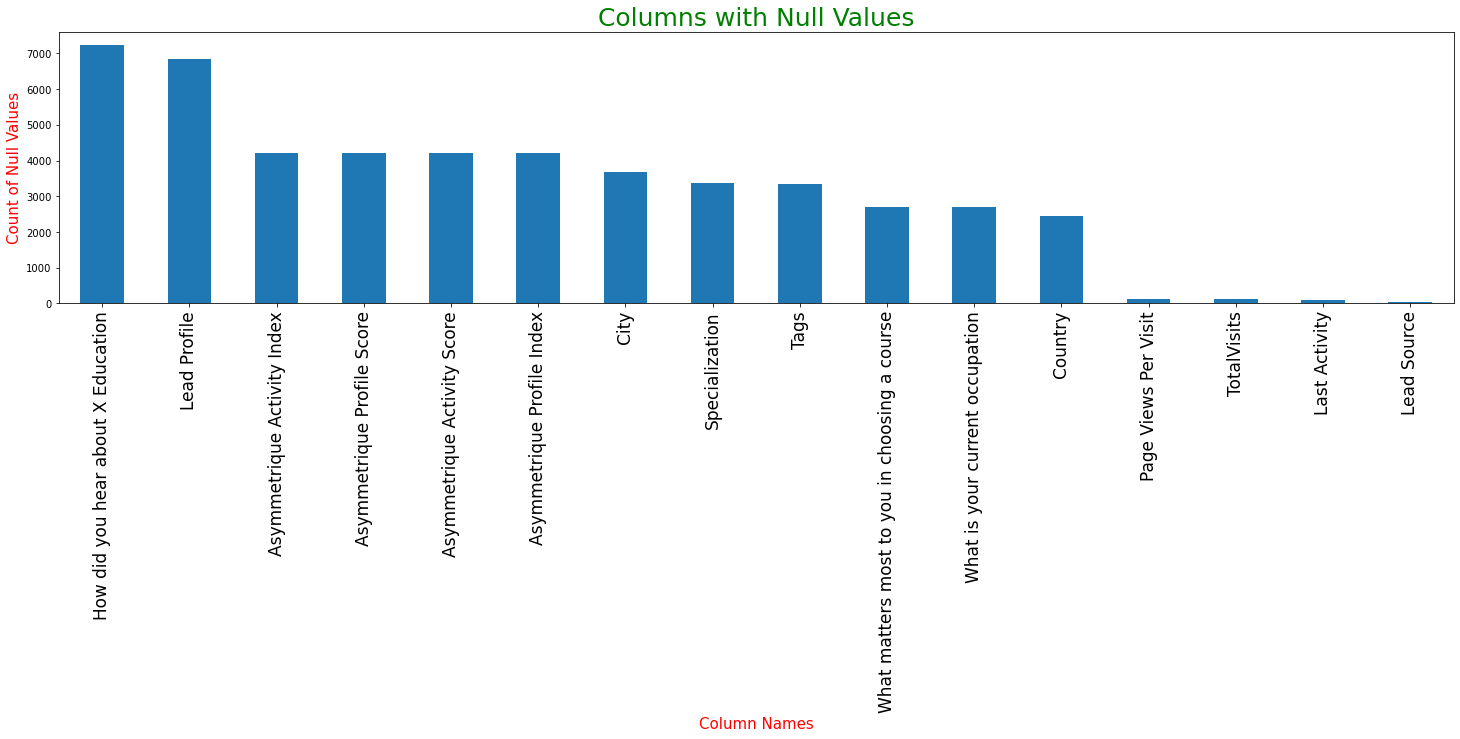

In [20]:
# ploting Missing values using graph

null_col=xdf.isnull().sum().sort_values(ascending=False)
null_col=null_col[null_col.values>(len(xdf)*0)]

plt.figure(figsize=[25,5])
null_col.plot.bar()

plt.title("Columns with Null Values" , fontdict={'fontsize':25,'fontweight':6,'color':'green'})

plt.xlabel("Column Names",fontdict={'fontsize':15,'fontweight':6,'color':'red'})
plt.ylabel("Count of Null Values",fontdict={'fontsize':15,'fontweight':6,'color':'red'})
plt.xticks(fontsize=17)

plt.show()

In [21]:
#Checking those column where Missing Values >40% (we check 30 to 40 % null values)
#it will be wise to drop all those column so that they will not impact analysis.

null_valuep_col40=null_valuesp[null_valuesp.values>40].sort_values(ascending=False)
print("Total no of columns having null Values >40 % :- ",len(null_valuep_col40),"\n")
null_valuep_col40

Total no of columns having null Values >40 % :-  6 



How did you hear about X Education    78.463203
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

In [22]:
#Dropping all columns having Null values greater than 40 %
print("No of Column need to drop:- ", len(null_valuep_col40))
drop_col=list(null_valuep_col40.index.values) #list of column which needs to drop from datframe df1
xdf.drop(drop_col,axis=1,inplace=True) # Droping Column

No of Column need to drop:-  6


# Null Value Imputation/ Treatment

Analysing remaining null column as per relevance and imputting Values accordingly

In [23]:
#Checking remaining Null Values columns

((xdf.isnull().sum()/len(xdf))*100).sort_values(ascending=False).head(10)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

In [24]:
#Column "City" 

xdf["City"].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

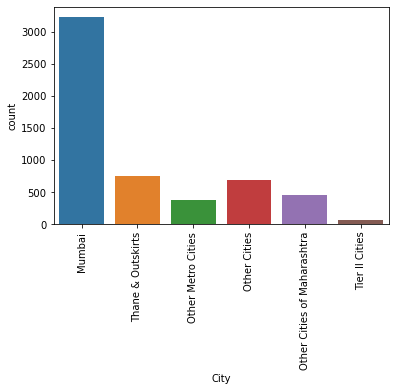

In [25]:
#Plotting gragh

sns.countplot(xdf["City"])
plt.xticks(rotation=90)
plt.show()

In [26]:
xdf["City"].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [27]:
# Around 58% of the total data is city 'Mumbai'. So we will impute Mumbai for NaN values.
xdf['City'] = xdf['City'].replace(np.nan, 'Mumbai')

In [28]:
#Checking null values 
xdf['City'].isnull().sum()


0

In [29]:
# Analysing column "Specialization"

xdf["Specialization"].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

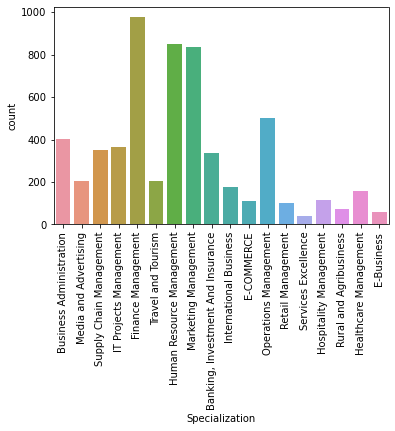

In [30]:
# The next column with highest NaN values is Specialization
sns.countplot(xdf["Specialization"])
plt.xticks(rotation=90)
plt.show()

we need to consider: Firstly, maybe the customer has not entered any Specialization because it might not be available on the list. 

Secondly, the customer may be a student having no Specialization. So we shall impute 'Others' which means that the customer has not chosen any given options.

In [31]:
# Imputting All Null values with Specialization category "Others"

xdf['Specialization'] = xdf['Specialization'].replace(np.nan, 'Others')

In [32]:
#Checking null values 
xdf['Specialization'].isnull().sum()


0

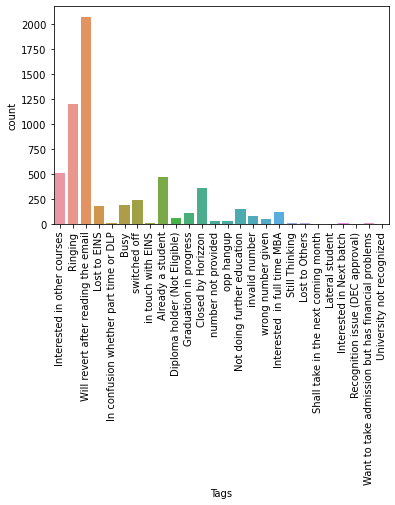

In [33]:
# Next column with highest NaN  values is 'Tags'
sns.countplot(xdf["Tags"])
plt.xticks(rotation=90)
plt.show()

In [34]:
xdf.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [35]:
# Impute with the value of Mode -  'Will revert after reading the email'

xdf['Tags'] = xdf['Tags'].replace(np.nan, 'Will revert after reading the email')

In [36]:
#Checking null values 
xdf['Tags'].isnull().sum()

0

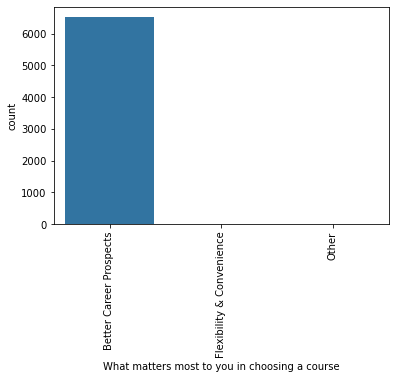

In [37]:
#Next column with highest NaN values is 'What matters most to you in choosing a course'

sns.countplot(xdf['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

In [38]:
xdf['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [39]:
# Replacing null values with Mode - "Better Career Prospects" - Generally people took courses for Better career

xdf['What matters most to you in choosing a course'] = xdf['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [40]:
#Checking null values 
xdf['What matters most to you in choosing a course'].isnull().sum()

0

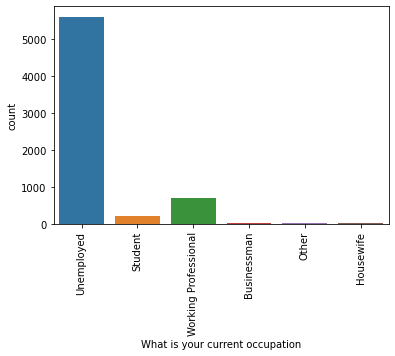

In [41]:
# Next column with highest NaN values is 'What is your current occupation'
sns.countplot(xdf['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

In [42]:
xdf['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [43]:
# In this case around 85% of the records have values 'Unemployed'.
# From business aspect we might infer that NaN values should be imputed to 'Other'.
# However here we will go along with the data and will impute NaN values with 'Unemployed'.

xdf['What is your current occupation'] = xdf['What is your current occupation'].replace(np.nan, 'Unemployed')

In [44]:
xdf['What is your current occupation'].isnull().sum()

0

In [45]:
# Next column with highest NaN values is 'Country'.
xdf["Country"].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [46]:
xdf["Country"].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [47]:
xdf["Country"].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

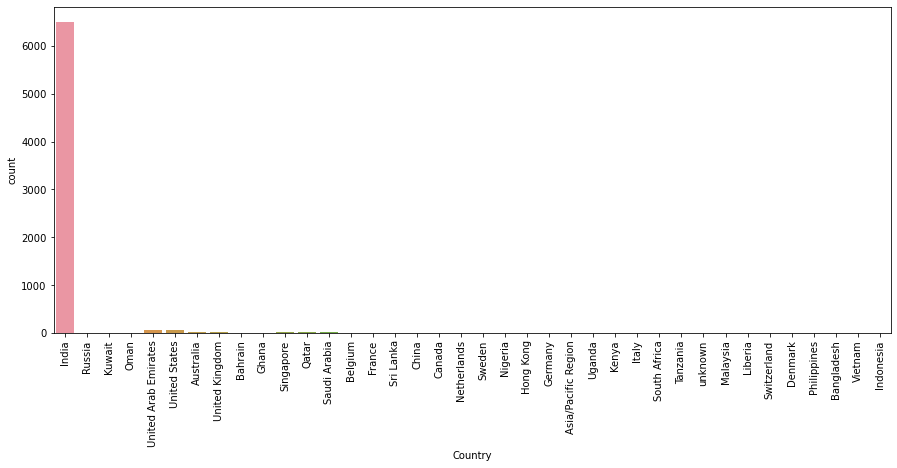

In [48]:
plt.figure(figsize=[15,6])
sns.countplot(xdf["Country"])
plt.xticks(rotation=90)
plt.show()

In [49]:
#As India has the highest frequency we would impute 'India' for NaN values.

xdf['Country'] = xdf['Country'].replace(np.nan, 'India')

In [50]:
xdf['Country'].isnull().sum()

0

In [51]:
#Checking remaining Null Values columns

((xdf.isnull().sum()/len(xdf))*100).sort_values(ascending=False).head(5)

TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
Lead Source             0.389610
Prospect ID             0.000000
dtype: float64

In [52]:
# Next column with highest NaN values is 'TotalVisits'. Numerical column
xdf["TotalVisits"].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [53]:
# Check the value counts for the column Total Visits

xdf['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [54]:
# Imputing the null values in TotalVisits by the median value which is 3.0 

xdf['TotalVisits'] = xdf['TotalVisits'].replace(np.nan, xdf['TotalVisits'].median())

In [55]:
#Checking remaining Null Values columns

((xdf.isnull().sum()/len(xdf))*100).sort_values(ascending=False).head(5)

Page Views Per Visit    1.482684
Last Activity           1.114719
Lead Source             0.389610
Prospect ID             0.000000
Newspaper               0.000000
dtype: float64

In [56]:
# Next column with highest NaN values is 'TotalVisits'.
xdf["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [57]:
xdf["Page Views Per Visit"].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.80        9
14.00       9
4.33        9
2.20        9
2.17        8
1.60        8
3.25        8
2.40        6
13.00       6
12.00       5
1.20        5
1.83        4
3.40        4
2.60        4
1.43        4
15.00       4
1.71        4
1.78        3
4.25        3
16.00       3
4.75        3
5.67        3
1.57        3
1.38        3
3.60        2
1.23        2
1.56        2
5.40        2
2.22        2
7.50        2
1.14        2
5.25        2
2.09        2
3.20        2
3.75        2
5.33        2
2.83        2
2.71        2
1.22        2
2.13        1
1.54        1
6.67  

In [58]:
#Imputing the null values in 'Page Views Per Visit' by the median value which is 2.0

xdf['Page Views Per Visit'] = xdf['Page Views Per Visit'].replace(np.nan, xdf['Page Views Per Visit'].median())

In [59]:
#Checking remaining Null Values columns

((xdf.isnull().sum()/len(xdf))*100).sort_values(ascending=False).head(5)

Last Activity                             1.114719
Lead Source                               0.389610
Prospect ID                               0.000000
Newspaper Article                         0.000000
A free copy of Mastering The Interview    0.000000
dtype: float64

In [60]:
# Check the value counts for the column Last Activity

xdf['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [61]:
# Since we do not have any information of what the last activity of the customer would have been, 
# we can add a new category called 'Not Sure' for the null values

xdf['Last Activity'] = xdf['Last Activity'].replace(np.nan, 'Not Sure')

In [62]:
# Check the value counts for the column Lead Source

xdf['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [63]:
xdf["Lead Source"].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [64]:
# From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value 
# "Google" to the same case.
# Also since "Google" has the major chunk of data, we can impute the null values with Google

xdf['Lead Source'] = xdf['Lead Source'].replace('google', 'Google')
xdf['Lead Source'] = xdf['Lead Source'].replace(np.nan, 'Google')

In [65]:
#Checking remaining Null Values columns
xdf.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

We have taken action on all Missing/Null values as per above information there is no column contains Null values.
Also we have take imputable measures to treat missing values.

In [66]:
xdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

# Dropping Unnecessary Columns not required for Analysis

In [67]:
# Deleting the columns 'Prospect ID' as it will not have any effect in the predicting model
xdf = xdf.drop('Prospect ID', axis=1)
#leads = leads.drop('Lead Number', axis=1)
xdf.shape

(9240, 30)

In [68]:
# Deleting the columns 'Lead Number' as it will not have any effect in the predicting model
xdf = xdf.drop('Lead Number', axis=1)

#leads = leads.drop('Lead Number', axis=1)
xdf.shape

(9240, 29)

In [69]:
xdf.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [70]:
#Checking Value counts as well as unique value Contained in each columns

for i in xdf.columns:
    print(f"{i} - value count is -\n\n",xdf[i].value_counts(),"\n")
    print('----------------------------------------------------------------------------------------')

Lead Origin - value count is -

 Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

----------------------------------------------------------------------------------------
Lead Source - value count is -

 Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64 

----------------------------------------------------------------------------------------
Do Not E

As per above analysis many column contains only one unique value as "No" which is having no use


Deleting the following columns as they have only one unique value and hence cannot be responsible in predicting a successful lead case

- Magazine
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque
  

In [71]:
#Dropping above mentioned column as no impact on analysis

xdf = xdf.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)
xdf.shape

(9240, 24)

In [72]:
#Use skew() function to find the skewness in data 
round(xdf.skew(skipna=True),2)

Converted                       0.47
TotalVisits                    20.06
Total Time Spent on Website     0.96
Page Views Per Visit            2.90
dtype: float64

As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed.

We can thus see that TotalVisitsis highly skewed towards right. So we need to treat the outlier and see.

# Outlier Treatment 

In [73]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%

xdf.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.438636                   487.698268   
std       0.486714     4.819024                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
90%       1.000000     7.000000                  1380.000000   
95%       1.000000    10.000000                  1562.000000   
99%       1.000000    17.000000                  1840.610000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.357440  
std                2.145781  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
90%                5.000000  
95%                6.000000  
99%                9.000000  
max               55.000000

In [74]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
print(numeric_variables)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


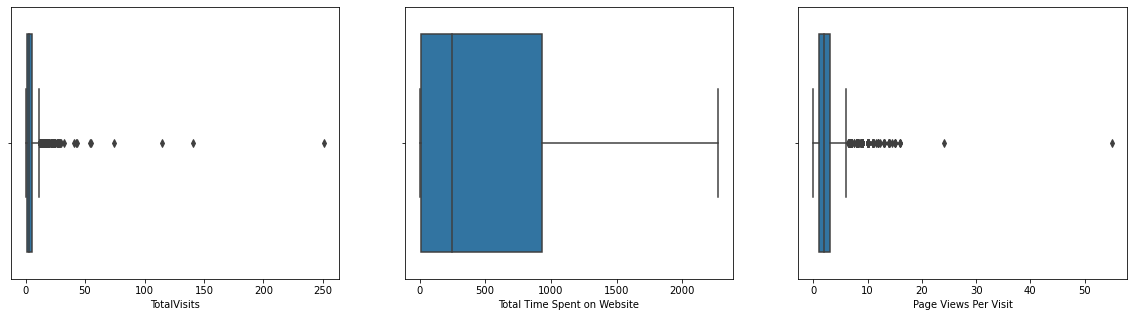

In [75]:
# Plotting for outliers
plt.figure(figsize = (20, 5))
for i, col in enumerate(numeric_variables):
    plt.subplot(1,3, i+1)
    sns.boxplot(xdf[col])
plt.show()

# Removing outlier values based on the Interquartile distance for some of the continuous variable

In [76]:
#Column "TotalVisits"
Q1 = xdf['TotalVisits'].quantile(0.25)
Q3 = xdf['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
xdf=xdf.loc[(xdf['TotalVisits'] >= Q1 - 1.5*IQR) & (xdf['TotalVisits'] <= Q3 + 1.5*IQR)]


#Column "Total Time Spent on Website"
Q1 = xdf['Total Time Spent on Website'].quantile(0.25)
Q3 = xdf['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1
xdf=xdf.loc[(xdf['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (xdf['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]

#Column "Page Views Per Visit"
Q1 = xdf['Page Views Per Visit'].quantile(0.25)
Q3 = xdf['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
xdf=xdf.loc[(xdf['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (xdf['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

In [77]:
xdf.shape

(8679, 24)

In [78]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%

xdf.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Converted  TotalVisits  Total Time Spent on Website  \
count  8679.000000  8679.000000                  8679.000000   
mean      0.383915     2.813688                   476.719899   
std       0.486366     2.416376                   546.185697   
min       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                     0.000000   
50%       0.000000     3.000000                   238.000000   
75%       1.000000     4.000000                   912.000000   
90%       1.000000     6.000000                  1373.000000   
95%       1.000000     7.000000                  1557.000000   
99%       1.000000    10.000000                  1840.220000   
max       1.000000    11.000000                  2272.000000   

       Page Views Per Visit  
count           8679.000000  
mean               2.075404  
std                1.640965  
min                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
90%                4.000000  
95%                5.000000  
99%                6.000000  
max                6.000000

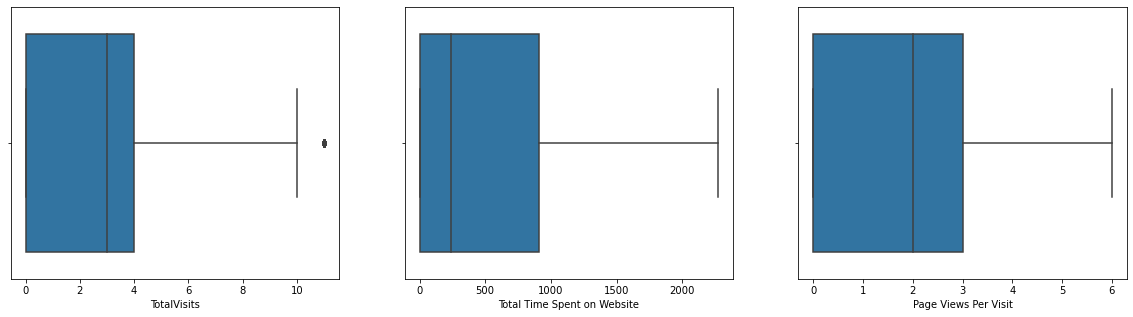

In [79]:
# Checking after outlier treatment - Plotting for outliers
plt.figure(figsize = (20, 5))
for i, col in enumerate(numeric_variables):
    plt.subplot(1,3, i+1)
    sns.boxplot(xdf[col])
plt.show()

In [80]:
#Checking dataframe
xdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8679 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8679 non-null   object 
 1   Lead Source                                    8679 non-null   object 
 2   Do Not Email                                   8679 non-null   object 
 3   Do Not Call                                    8679 non-null   object 
 4   Converted                                      8679 non-null   int64  
 5   TotalVisits                                    8679 non-null   float64
 6   Total Time Spent on Website                    8679 non-null   int64  
 7   Page Views Per Visit                           8679 non-null   float64
 8   Last Activity                                  8679 non-null   object 
 9   Country                                        8679 

In [81]:
#Checking Data Imbalance on Target Variable - "Converted"

In [82]:
# Checking Imbalance of Data Converted_0 == 0(Lead not Converted) test_data1== 1 (Lead Converted)

Converted_0=xdf[xdf["Converted"]==0]
Converted_1=xdf[xdf["Converted"]==1]
print("shape of All not Converted Leads -", Converted_0.shape)
print("shape of All Converted Lead -", Converted_1.shape)

shape of All not Converted Leads - (5347, 24)
shape of All Converted Lead - (3332, 24)


In [83]:
#Calculating Data Imbalance
imbalance= round((Converted_0.shape[0])/(Converted_1.shape[0]),3)
print("Imbalance Ratio is =",imbalance)

Imbalance Ratio is = 1.605


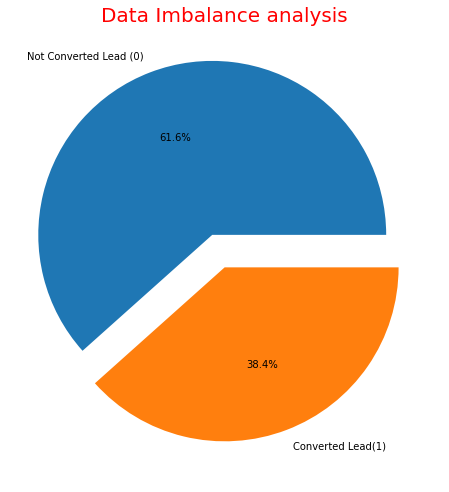

In [84]:
# Checking data distribution using Pie Chart
plt.figure(figsize=[8,8])
myexplode=[0.2,0]
plt.pie([Converted_0.shape[0],Converted_1.shape[0]], labels=["Not Converted Lead (0)","Converted Lead(1)"], explode=myexplode, autopct='%1.1f%%')
plt.title("Data Imbalance analysis\n", fontdict={'fontsize':20,'fontweight':6,'color':'red'})
plt.show()

Note:- As per above analysis Data is not much imbalanced 61.6% belong to Not Converted Leads and 38.4 % belong to Converted lead in Data.

# Performing Exploratory Data Analysis

### Categorical Variables

In [85]:
xdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8679 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8679 non-null   object 
 1   Lead Source                                    8679 non-null   object 
 2   Do Not Email                                   8679 non-null   object 
 3   Do Not Call                                    8679 non-null   object 
 4   Converted                                      8679 non-null   int64  
 5   TotalVisits                                    8679 non-null   float64
 6   Total Time Spent on Website                    8679 non-null   int64  
 7   Page Views Per Visit                           8679 non-null   float64
 8   Last Activity                                  8679 non-null   object 
 9   Country                                        8679 

In [86]:
#Checking Variable contain single Unique Value
xdf['Newspaper Article'].value_counts()

No    8679
Name: Newspaper Article, dtype: int64

In [87]:
##Dropping column "Newspaper Article" as no impact on analysis it only contains NO

xdf = xdf.drop(columns="Newspaper Article", axis=1)
xdf.shape

(8679, 23)

In [88]:
# Categorical variables
category_var = list(xdf.columns[xdf.dtypes == 'object'])
category_var

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'Lead Quality',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [89]:
# Functions to plot countplots for categorical variables with target variable

# For single plot
def plot_cat_var(var):
    plt.figure(figsize=(20, 7))
    sns.countplot(x = var, hue = "Converted", data = xdf)
    plt.xticks(fontsize=15,rotation = 90)
    plt.xlabel(var,fontsize=20)
    plt.show()

# For multiple plots    
def plot_cat_multivar(lst):
    l = int(len(lst)/2)
    plt.figure(figsize=(20, l*7))
    for var in lst:
        plt.subplot(l,2,lst.index(var)+1)
        sns.countplot(x = var, hue = "Converted", data = xdf)
        plt.xticks(fontsize=15,rotation = 90)
        plt.tight_layout
    
    plt.show()

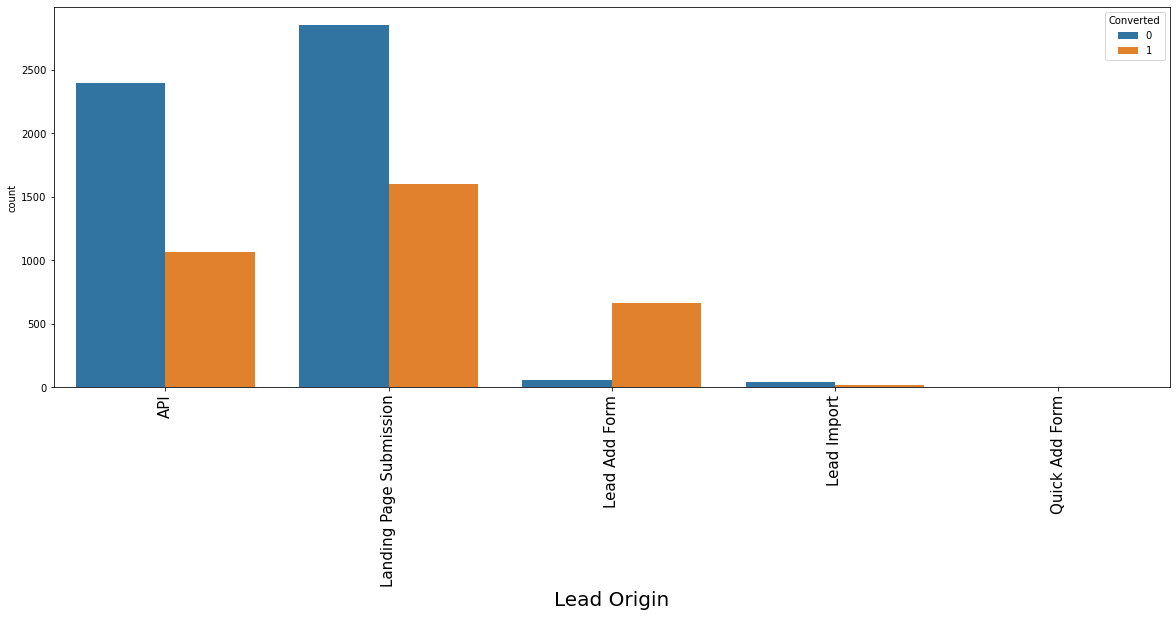

In [90]:
#Plotting gragh - column "Lead Origin"
plot_cat_var(category_var[0])

# Observation:-

In column "Lead Origin"

- 'API' and 'Landing Page Submission' generate the most leads but have less conversion rates of around 30%. Whereas, 'Lead Add Form' generates less leads but conversion rate is great. We should try to increase conversion rate for 'API' and 'Landing Page Submission', and increase leads generation using 'Lead Add Form'. 'Lead Import' does not seem very significant.


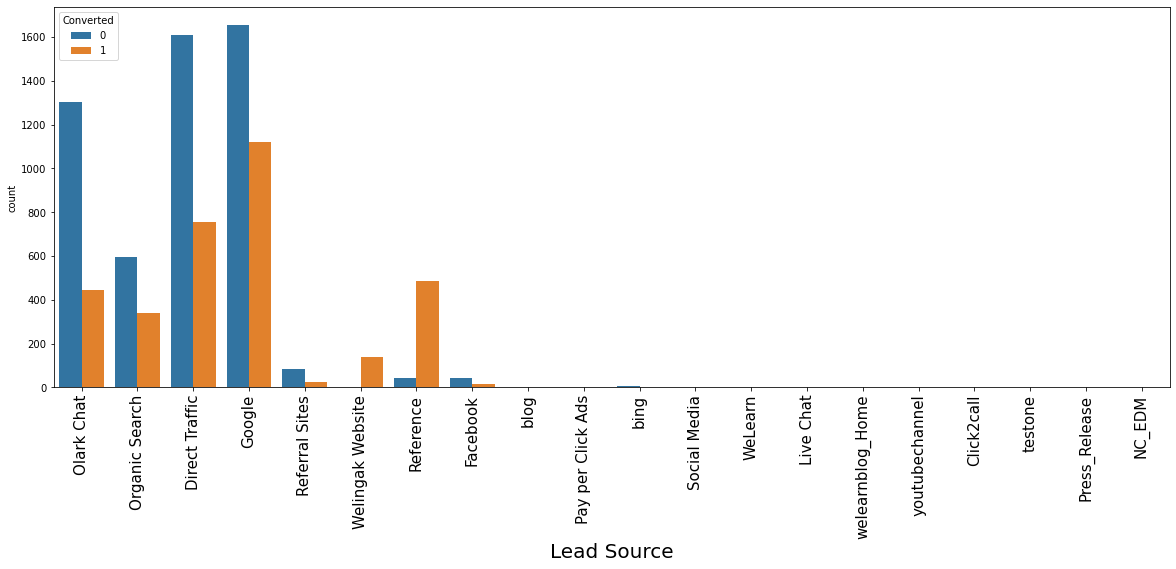

In [91]:
#Plotting gragh - column "Lead Source"
plot_cat_var(category_var[1])

# Observations- 

In Column "Lead Source" :

- Spelling error: We've to changed 'google' to 'Google'
- As it can be seen from the graph, number of leads generated by many of the sources are negligible. There are sufficient numbers till Facebook. We can convert all others in one single category of 'Others'.
- 'Direct Traffic' and 'Google' generate maximum number of leads while maximum conversion rate is achieved through 'Reference' and 'Welingak Website'.

In [92]:
#Reduce Categories 
categories = xdf['Lead Source'].unique()
categories

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Live Chat', 'welearnblog_Home', 'youtubechannel', 'Click2call',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

In [93]:
# To reduce categories after 8 category clubbing into one - "Others"
xdf['Lead Source'] = xdf['Lead Source'].replace(categories[8:], 'Others')

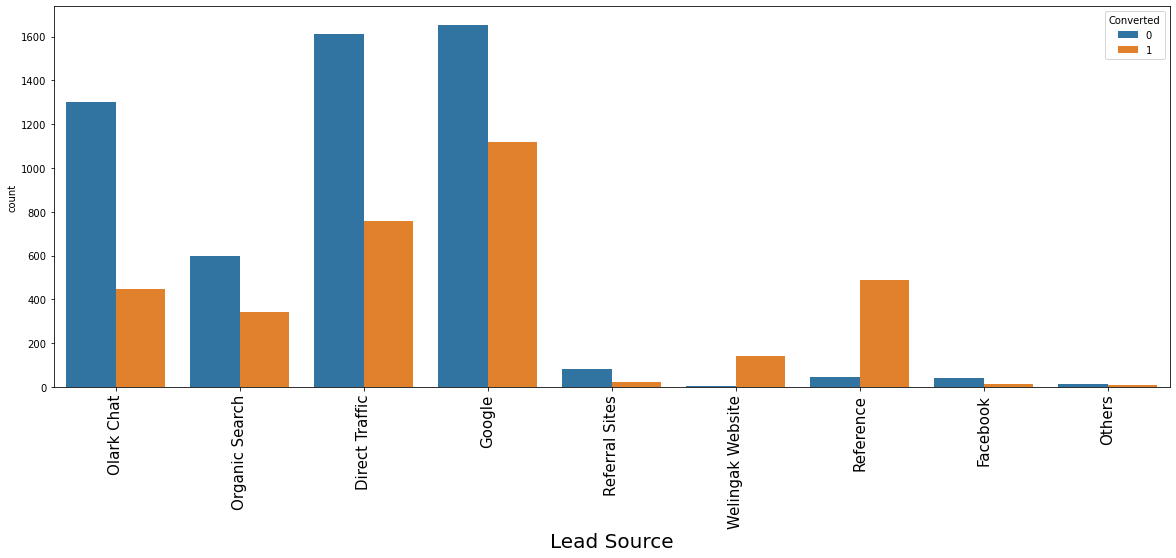

In [94]:
#Plotting gragh - column "Lead Source"
plot_cat_var(category_var[1])

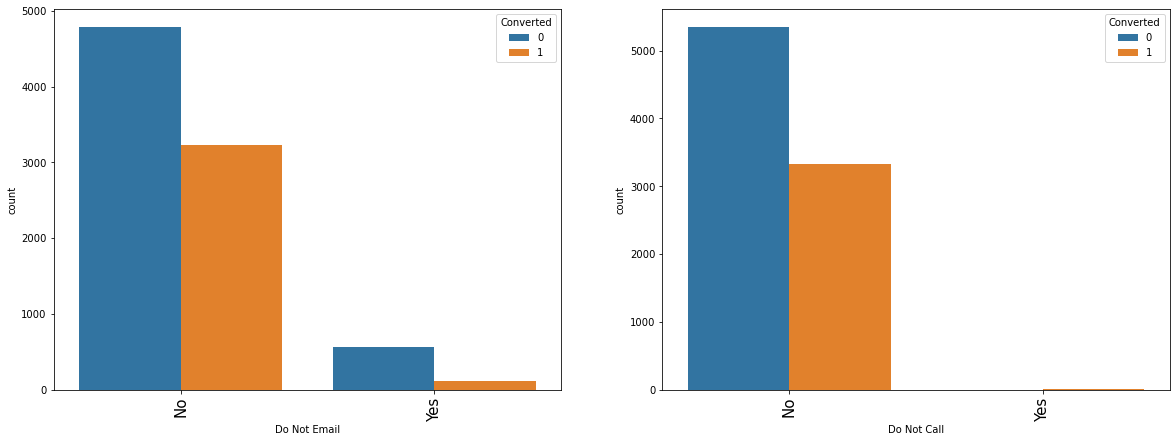

In [95]:
#Plotting Columns "Do Not Email" & "Do Not Call"
plot_cat_multivar([category_var[2],category_var[3]])

# Observations 

For columns Do Not Email and Do Not Call :
- As one can expect, most of the responses are 'No' for both the variables which generated most of the leads.

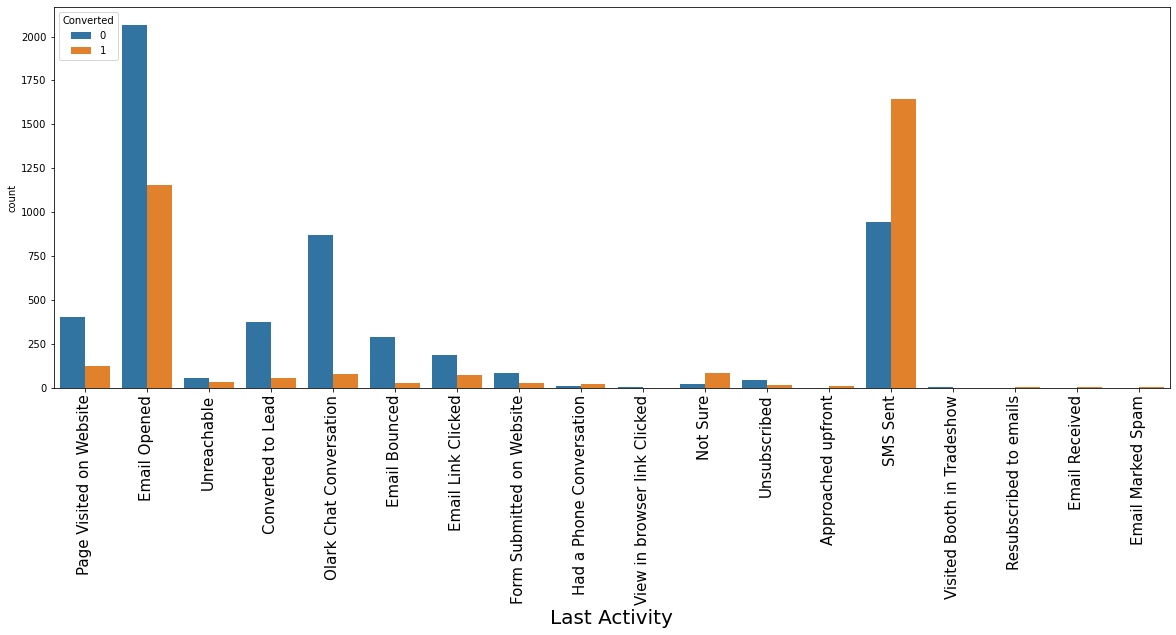

In [96]:
#Plotting gragh - column "Last Activity"
plot_cat_var(category_var[4])

# Observations-

In Column Last Activity :

- Highest number of lead are generated where the last activity is 'Email Opened' while maximum conversion rate is for the activity of 'SMS Sent'. Its conversion rate is significantly high.
- Categories after the 'SMS Sent' have almost negligible effect. We can aggregate them all in one single category.

In [97]:
categories = xdf['Last Activity'].unique()
categories

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'Not Sure', 'Unsubscribed', 'Approached upfront', 'SMS Sent',
       'Visited Booth in Tradeshow', 'Resubscribed to emails',
       'Email Received', 'Email Marked Spam'], dtype=object)

We can see that we do not require last five categories.

In [98]:
# To reduce categories
xdf['Last Activity'] = xdf['Last Activity'].replace(categories[-5:], 'Others')

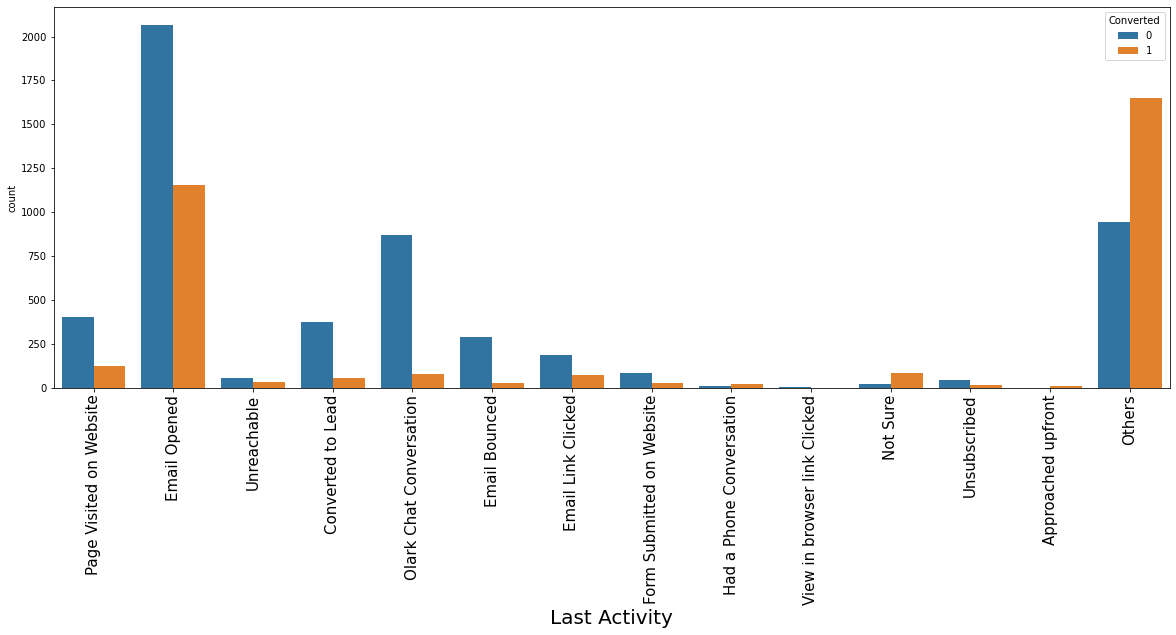

In [99]:
#Plotting gragh - column "Last Activity"
plot_cat_var(category_var[4])

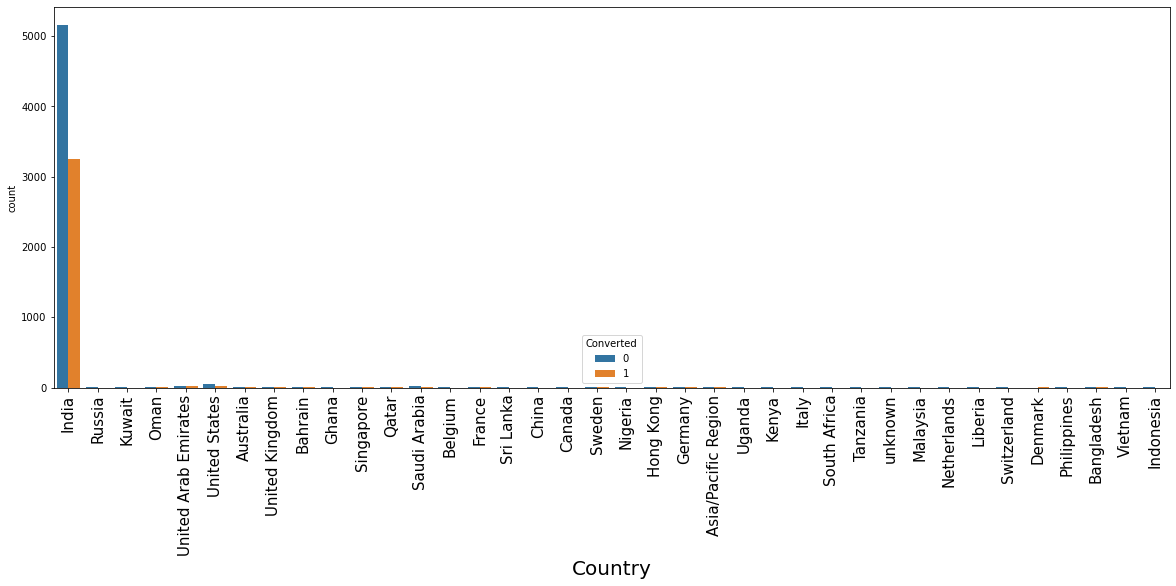

In [100]:
#Plotting gragh - column "Country"
plot_cat_var(category_var[5])

# Observations 
For Column Country :
- Most of the responses are for India. Others are not significant.

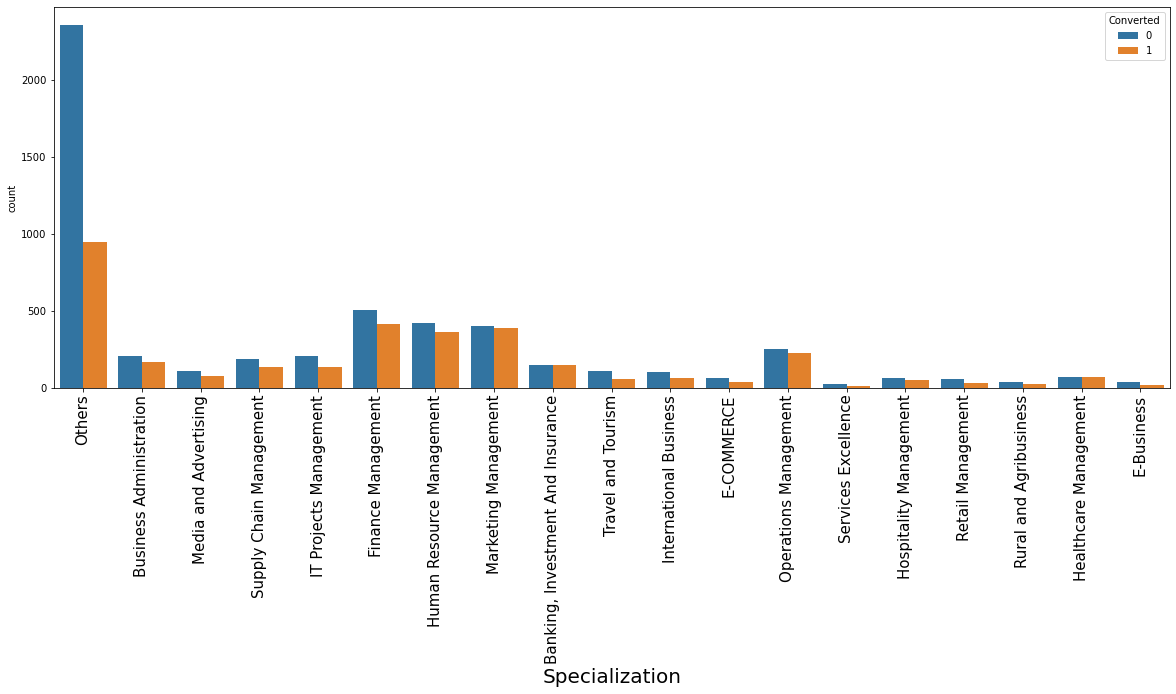

In [101]:
#Plotting gragh - column "Specialization"
plot_cat_var(category_var[6])

# Observations 
For Column Specialization :
- Conversion rates are mostly similar across different specializations.

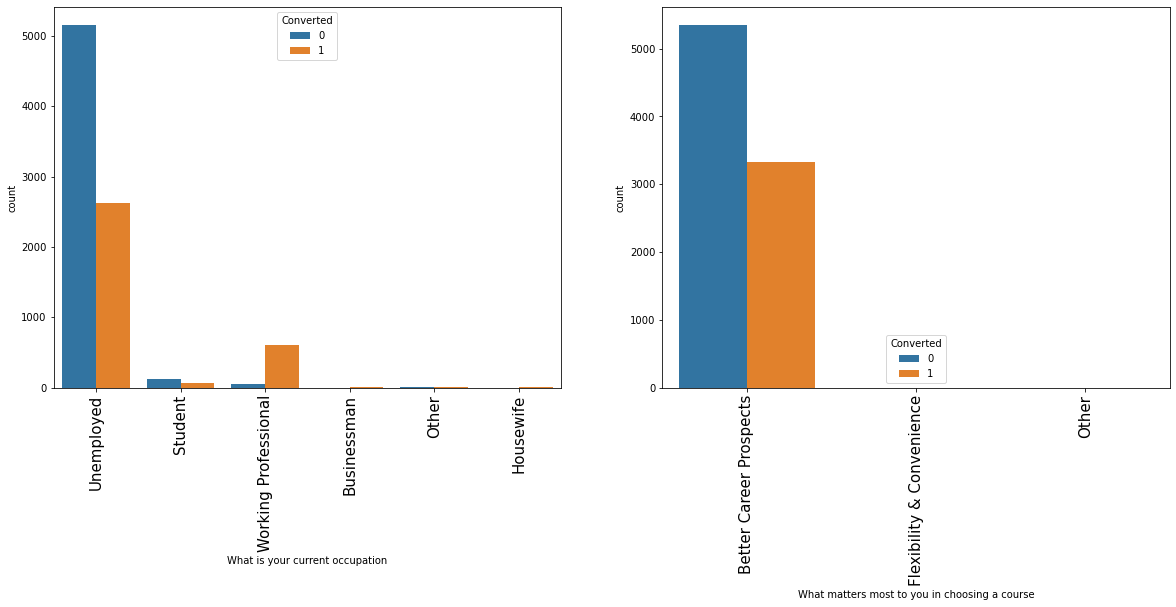

In [102]:
#Plotting gragh - column 'What is your current occupation' &  "What matters most to you in choosing a course"
plot_cat_multivar([category_var[7],category_var[8]])

# Observations 
For Columns "What is your current occupation" and "What matters most to you in choosing a course" :

- The highest conversion rate is for 'Working Professional'. High number of leads are generated for 'Unemployed' but conversion rate is low.
- Variable 'What matters most to you in choosing a course' has only one category with significant count.

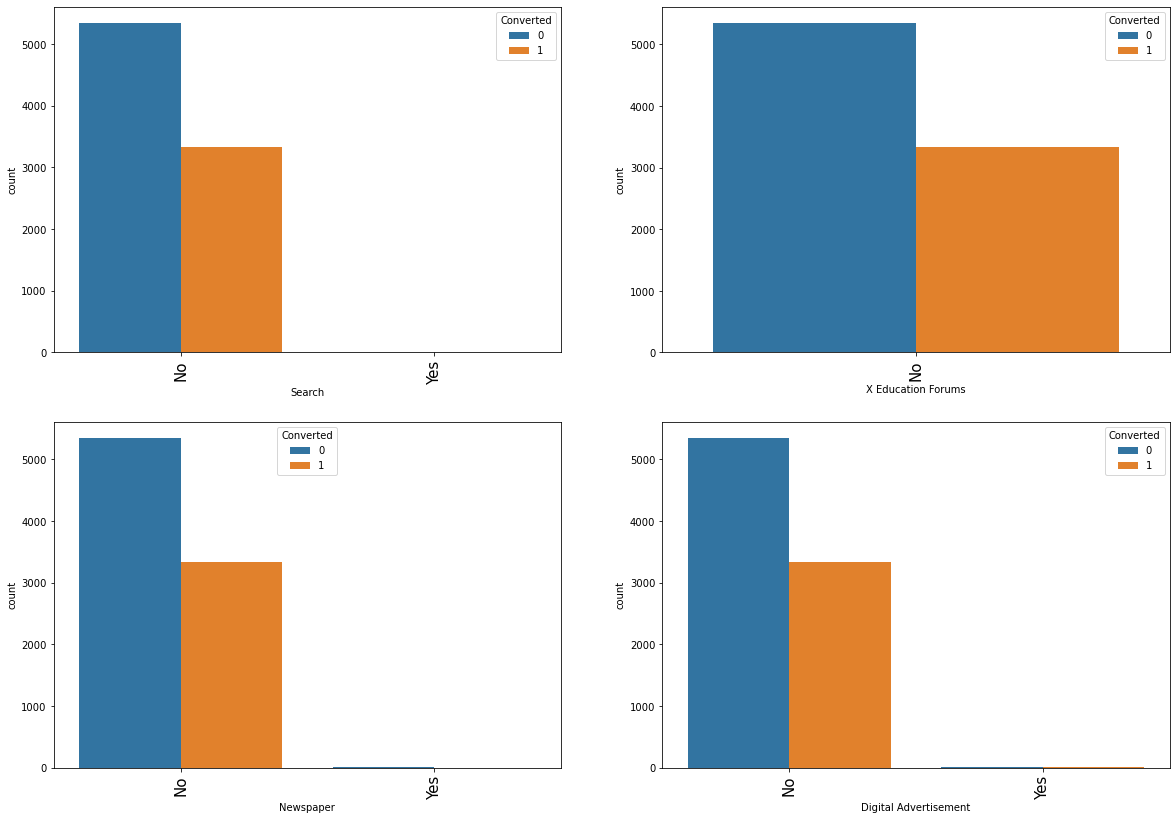

In [103]:
#Plotting graphs 'Search','X Education Forums','Newspaper' & 'Digital Advertisement'
plot_cat_multivar(category_var[9:13])

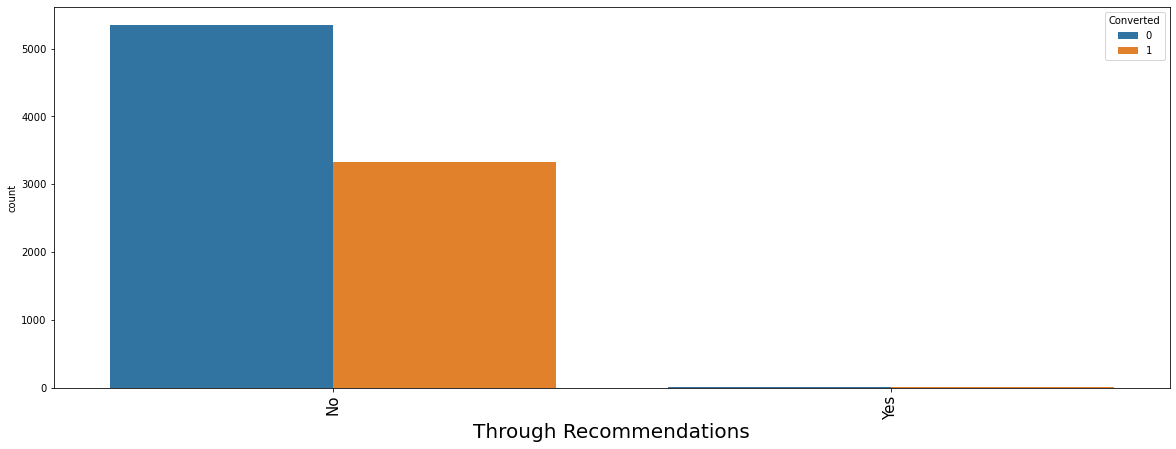

In [104]:
#Plotting graph -'Through Recommendations'
plot_cat_var(category_var[13])

# Observations 
For columns Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, and Receive More Updates About Our Courses:

- As all the above variables have most of the values as no, nothing significant can be inferred from these plots.

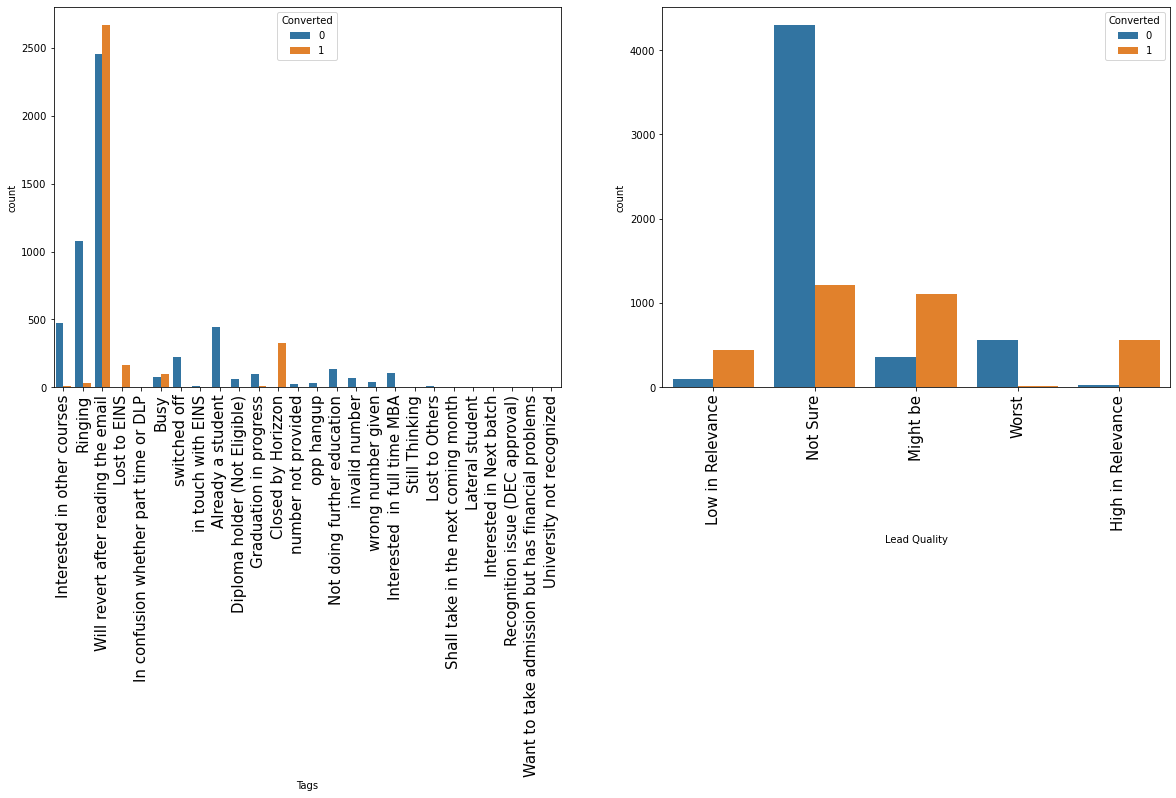

In [105]:
#Plotting Graphs - columns "Tags" & "Lead Quality"
plot_cat_multivar([category_var[14],category_var[15]])

# Observations 

For Columns Tags and Lead Quality:

- In Tags, categories after 'Interested in full time MBA' have very few leads generated, so we can combine them into one single category.
- Most leads generated and the highest conversion rate are both attributed to the tag 'Will revert after reading the email'.
- In Lead quality, as expected, 'Might be' as the highest conversion rate while 'Worst' has the lowest.

In [106]:
#Checking and Reducing Categories 
categories = xdf['Tags'].unique()
categories

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [107]:
# To reduce categories - Combining last 8 Categories into "Others"
xdf['Tags'] = xdf['Tags'].replace(categories[-8:], 'Others')

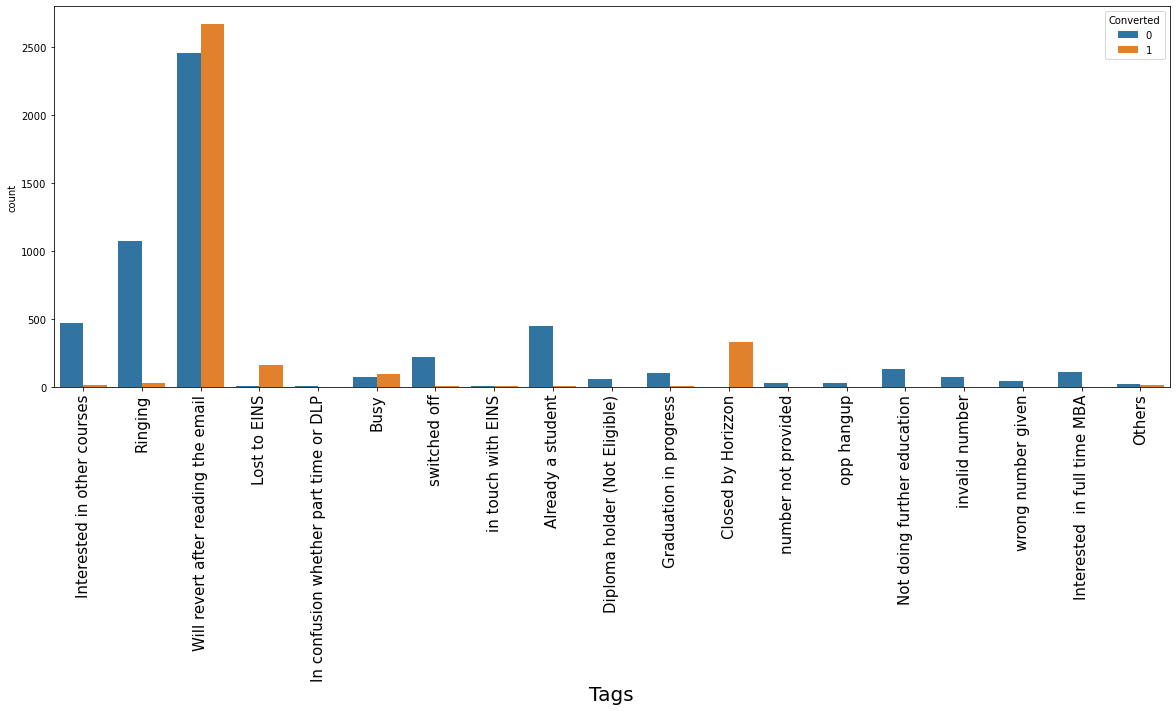

In [108]:
# To plot new categories - Column "Tags"
plot_cat_var(category_var[14])

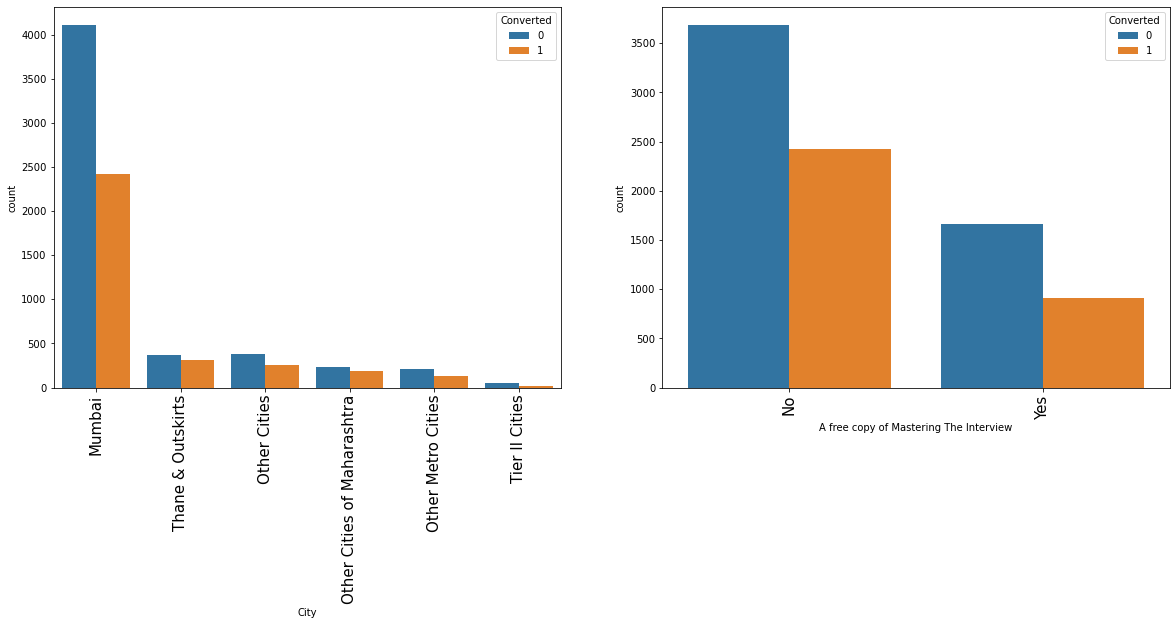

In [109]:
#Plotting Graphs - columns  'City' & 'A free copy of Mastering The Interview'
plot_cat_multivar(category_var[16:18])

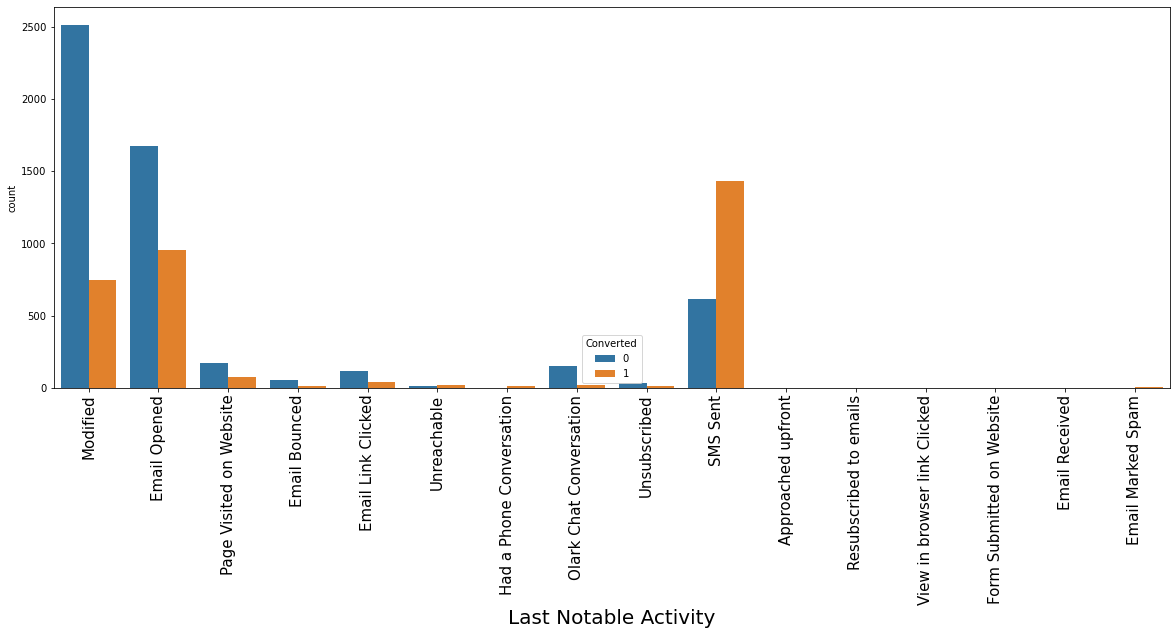

In [110]:
#Plotting Graph - column 'Last Notable Activity'
plot_cat_var(category_var[18])

# Observations 

For Columns "City", "A free copy of Mastering The Interview" and "Last Notable Activity" :

- In City, most of the leads are generated for 'Mumbai'.
- In 'A free copy of Mastering The Interview', both categories have similar conversion rates.
- In 'Last Notable Activity', we can combine categories after 'SMS Sent' similar to the variable 'Last Activity'. It has most generated leads for the category 'Modified' while most conversion rate for 'SMS Sent' activity.

In [111]:
#Checking and Reducing Categories
categories = xdf['Last Notable Activity'].unique()
categories

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Had a Phone Conversation', 'Olark Chat Conversation',
       'Unsubscribed', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

We can see that we do not require last six categories.

In [112]:
# To reduce categories
xdf['Last Notable Activity'] = xdf['Last Notable Activity'].replace(categories[-6:], 'Others')

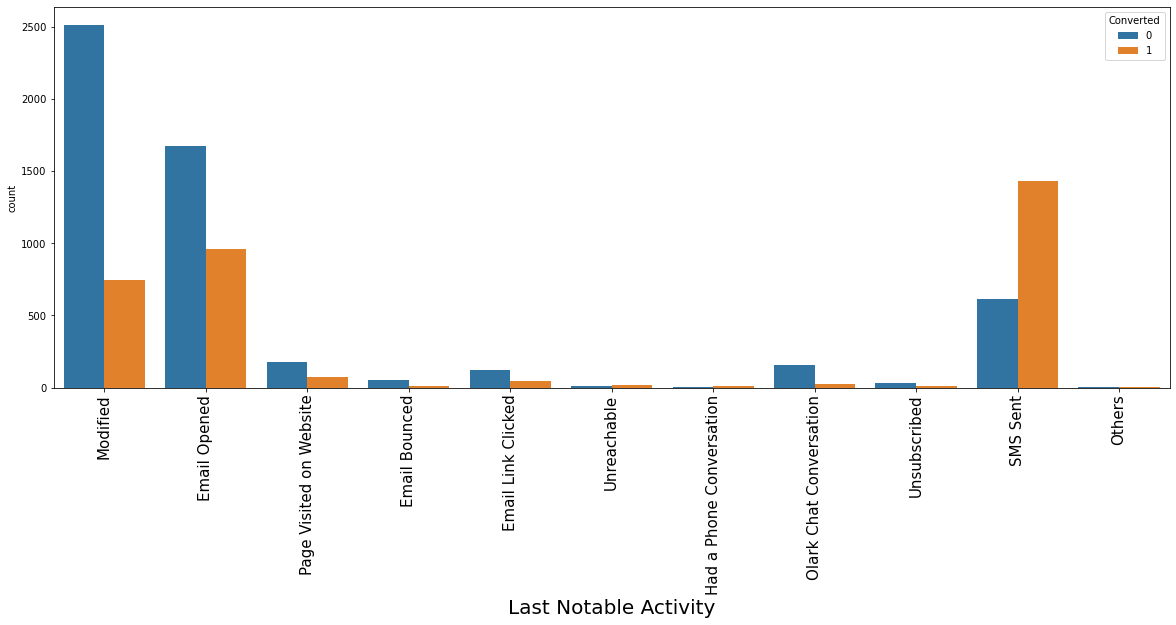

In [113]:
#Plotting Graph - column 'Last Notable Activity'
plot_cat_var(category_var[18])

#### Based on the data visualization, we can drop the variables which are not significant for analysis and will not any information to the model.

In [114]:
xdf=xdf.drop(["Do Not Call","What matters most to you in choosing a course","Search",'Newspaper','Digital Advertisement',
             "Through Recommendations","X Education Forums"],axis=1)

In [115]:
#Checking shape of Dataframe
xdf.shape

(8679, 16)

In [116]:
#Checking latest data information
xdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8679 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8679 non-null   object 
 1   Lead Source                             8679 non-null   object 
 2   Do Not Email                            8679 non-null   object 
 3   Converted                               8679 non-null   int64  
 4   TotalVisits                             8679 non-null   float64
 5   Total Time Spent on Website             8679 non-null   int64  
 6   Page Views Per Visit                    8679 non-null   float64
 7   Last Activity                           8679 non-null   object 
 8   Country                                 8679 non-null   object 
 9   Specialization                          8679 non-null   object 
 10  What is your current occupation         8679 non-null   obje

# Numerical Variables

In [117]:
#Describing Numerical features

xdf.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  8679.000000  8679.000000                  8679.000000   
mean      0.383915     2.813688                   476.719899   
std       0.486366     2.416376                   546.185697   
min       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                     0.000000   
50%       0.000000     3.000000                   238.000000   
75%       1.000000     4.000000                   912.000000   
max       1.000000    11.000000                  2272.000000   

       Page Views Per Visit  
count           8679.000000  
mean               2.075404  
std                1.640965  
min                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
max                6.000000

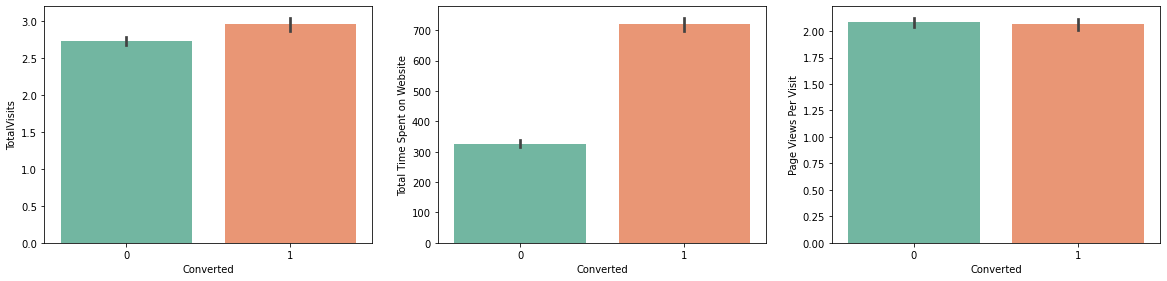

In [118]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = xdf)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = xdf)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = xdf)
plt.show()

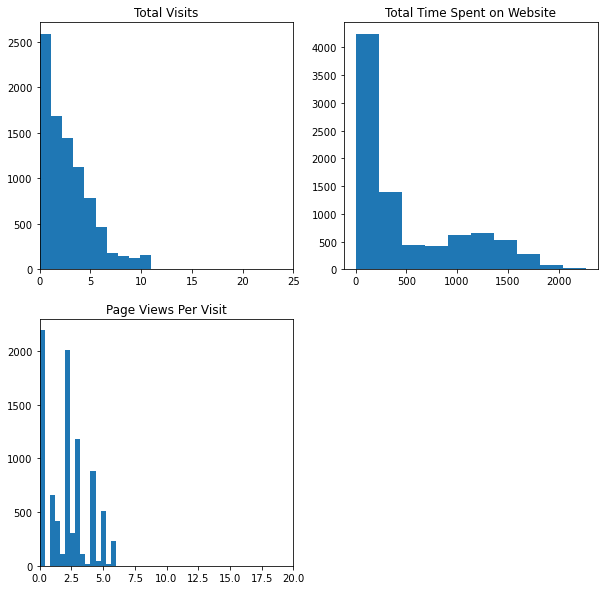

In [119]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(xdf['TotalVisits'], bins = 10)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(xdf['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(xdf['Page Views Per Visit'], bins = 15)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

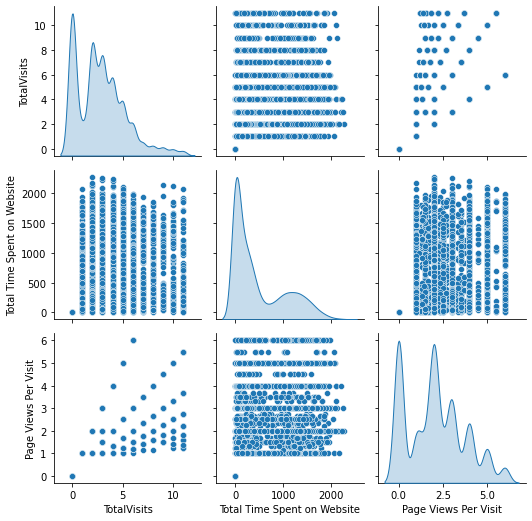

In [120]:
pp=sns.pairplot(xdf[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]], diag_kind="kde")
pp.fig.suptitle("")

plt.tight_layout()
plt.show()

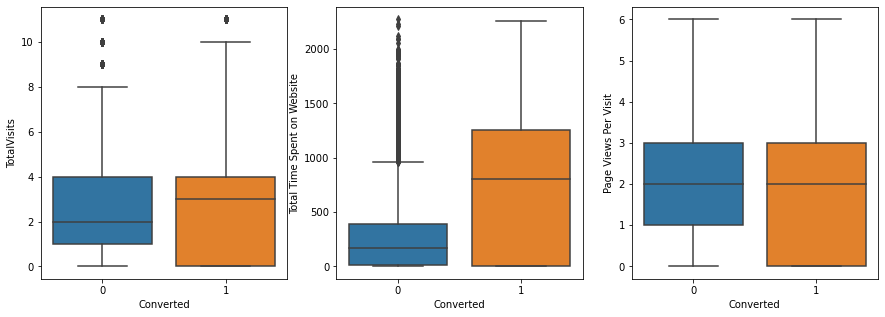

In [121]:
# To plot numerical variables against target variable to analyse relations
plt.figure(figsize=(15, 5))
for var in numeric_variables:
    plt.subplot(1,3,numeric_variables.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = xdf)
    
plt.tight_layout
plt.show()

# Observations:

- 'TotalVisits' has same median values for both outputs of leads. No conclusion can be drwan from this.
- People spending more time on the website are more likely to be converted. This is also aligned with our general knowledge.
- 'Page Views Per Visit' also has same median values for both outputs of leads. Hence, inconclusive.

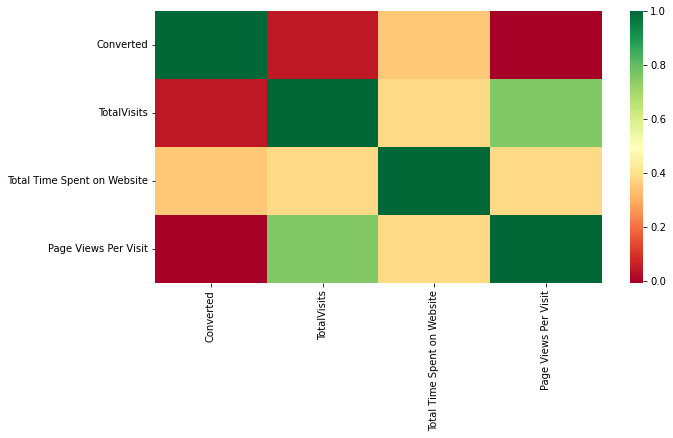

In [122]:
# To check the correlation among varibles
corr=xdf.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, cmap="RdYlGn")
plt.show()

#### Percentage of Data retained after Missing value & outlier Treatments

In [123]:
print(round(100 * (xdf.shape[0] / xdf_orignal.shape[0])),"% row is retained after missing value and outliers treatment.")

94 % row is retained after missing value and outliers treatment.


# Data Preparation & Transformation 

In [124]:
xdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8679 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8679 non-null   object 
 1   Lead Source                             8679 non-null   object 
 2   Do Not Email                            8679 non-null   object 
 3   Converted                               8679 non-null   int64  
 4   TotalVisits                             8679 non-null   float64
 5   Total Time Spent on Website             8679 non-null   int64  
 6   Page Views Per Visit                    8679 non-null   float64
 7   Last Activity                           8679 non-null   object 
 8   Country                                 8679 non-null   object 
 9   Specialization                          8679 non-null   object 
 10  What is your current occupation         8679 non-null   obje

In [125]:
xdf.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website   India                   Others   
1             Email Opened   India                   Others   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

       Lead Quality    City A free copy of Mastering The Interview  \
0  Low in Relevance  Mumbai                                     No   
1          Not Sure  Mumbai                                     No   
2          Might be  Mumbai                                    Yes   
3          Not Sure  Mumbai                                     No   
4          Might be  Mumbai                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [126]:
xdf["Do Not Email"].value_counts()

No     8008
Yes     671
Name: Do Not Email, dtype: int64

In [127]:
xdf["A free copy of Mastering The Interview"].value_counts()

No     6109
Yes    2570
Name: A free copy of Mastering The Interview, dtype: int64

### Converting some binary variables (Yes/No) to 0/1

In [128]:
# Mapping Yes & No to 0/1 to the columns - "Do Not Email" & "A free copy of Mastering The Interview"

xdf['Do Not Email'] = xdf['Do Not Email'].map({'Yes': 1, 'No': 0})
xdf['A free copy of Mastering The Interview'] = xdf['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

xdf.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website   India                   Others   
1             Email Opened   India                   Others   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

       Lead Quality    City  A free copy of Mastering The Interview  \
0  Low in Relevance  Mumbai                                       0   
1          Not Sure  Mumbai                                       0   
2          Might be  Mumbai                                       1   
3          Not Sure  Mumbai                                       0   
4          Might be  Mumbai                                       0   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [129]:
xdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8679 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8679 non-null   object 
 1   Lead Source                             8679 non-null   object 
 2   Do Not Email                            8679 non-null   int64  
 3   Converted                               8679 non-null   int64  
 4   TotalVisits                             8679 non-null   float64
 5   Total Time Spent on Website             8679 non-null   int64  
 6   Page Views Per Visit                    8679 non-null   float64
 7   Last Activity                           8679 non-null   object 
 8   Country                                 8679 non-null   object 
 9   Specialization                          8679 non-null   object 
 10  What is your current occupation         8679 non-null   obje

## For categorical variables with multiple levels, creating dummy features (one-hot encoded)

In [130]:
# Categorical variables
dummy_var = list(xdf.columns[xdf.dtypes == 'object'])
dummy_var


['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [131]:
# creating dummy columns
dummy_assignment = pd.get_dummies(xdf[dummy_var], drop_first=True)

dummy_assignment.head(10)

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   
5                                    0                          0   
6                                    1                          0   
7                                    0                          0   
8                                    1                          0   
9                                    0                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   
5                        0                           0                     0   
6                        0                           0                     0   
7                        0                           0                     0   
8                        0                           0                     0   
9                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   
5                   0                       1                           0   
6                   1                       0                           0   
7                   0                       1                           0   
8                   0                       0                           0   
9                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   
5                   0                      0                           0   
6                   0                      0                           0   
7                   0                      0                           0   
8                   0                      0                           0   
9                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Converted to Lead  \
0                             0                                0   
1                             0                                0   
2                             0                                0   
3                             0                                0   
4                             0                                1   
5                             0                                0   
6                             0                                0   
7                             0                                0   
8                             0                                0 

In [132]:
dummy_assignment.shape # Checking Shape of Dummy variable created

(8679, 122)

In [133]:
# concat with original data set 
#Creating new master Datframe for further analysis xdf_d1

xdf_d1 = pd.concat([xdf, dummy_assignment], axis = 1)
xdf_d1.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website   India                   Others   
1             Email Opened   India                   Others   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

       Lead Quality    City  A free copy of Mastering The Interview  \
0  Low in Relevance  Mumbai                                       0   
1          Not Sure  Mumbai                                       0   
2          Might be  Mumbai                                       1   
3          Not Sure  Mumbai                                       0   
4          Might be  Mumbai                                       0   

  Last Notable Activity  Lead Origin_Landing Page Submission  \
0              Modified                                    0   
1          Email Opened                                    0   
2          Email Opened                                    1   
3              Modified                                    1   
4              Modified                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           0                     0                   0   
3                           0                     0                   0   
4                           0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   


In [134]:
# dropping the original columns
xdf_d1.drop(dummy_var, axis = 1, inplace = True)
xdf_d1.shape

(8679, 128)

In [135]:
xdf_d1.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Converted to Lead  \
0                             0                                0   
1                             0                                0   
2                             0                                0   
3                             0                                0   
4                             0                                1   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Had a Phone Conversation  Last Activity_Not Sure  \
0                  

In [136]:
#Checking Dataframe info after Dummy creation

xdf_d1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8679 entries, 0 to 9239
Data columns (total 128 columns):
 #    Column                                                Dtype  
---   ------                                                -----  
 0    Do Not Email                                          int64  
 1    Converted                                             int64  
 2    TotalVisits                                           float64
 3    Total Time Spent on Website                           int64  
 4    Page Views Per Visit                                  float64
 5    A free copy of Mastering The Interview                int64  
 6    Lead Origin_Landing Page Submission                   uint8  
 7    Lead Origin_Lead Add Form                             uint8  
 8    Lead Origin_Lead Import                               uint8  
 9    Lead Origin_Quick Add Form                            uint8  
 10   Lead Source_Facebook                                  uint8  
 11   Le

In [137]:
#Validating Null values if any
xdf_d1.isnull().sum()

Do Not Email                                            0
Converted                                               0
TotalVisits                                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
A free copy of Mastering The Interview                  0
Lead Origin_Landing Page Submission                     0
Lead Origin_Lead Add Form                               0
Lead Origin_Lead Import                                 0
Lead Origin_Quick Add Form                              0
Lead Source_Facebook                                    0
Lead Source_Google                                      0
Lead Source_Olark Chat                                  0
Lead Source_Organic Search                              0
Lead Source_Others                                      0
Lead Source_Reference                                   0
Lead Source_Referral Sites                              0
Lead Source_We

In [138]:
#Now lets check the correlation between variables again
xdf_d1.corr()

Do Not Email  Converted  \
Do Not Email                                            1.000000  -0.131819   
Converted                                              -0.131819   1.000000   
TotalVisits                                            -0.022136   0.046652   
Total Time Spent on Website                            -0.042049   0.350731   
Page Views Per Visit                                    0.009321  -0.005632   
A free copy of Mastering The Interview                  0.050369  -0.041339   
Lead Origin_Landing Page Submission                     0.093839  -0.052885   
Lead Origin_Lead Add Form                              -0.019047   0.332400   
Lead Origin_Lead Import                                -0.017418  -0.023294   
Lead Origin_Quick Add Form                              0.037084   0.013599   
Lead Source_Facebook                                   -0.017418  -0.023294   
Lead Source_Google                                     -0.056796   0.027134   
Lead Source_Olark Chat                                 -0.050710  -0.133556   
Lead Source_Organic Search                              0.027187  -0.014298   
Lead Source_Others                                      0.003305  -0.000300   
Lead Source_Reference                                  -0.037896   0.279893   
Lead Source_Referral Sites                             -0.008622  -0.036011   
Lead Source_Welingak Website                            0.000337   0.159044   
Last Activity_Converted to Lead                        -0.063685  -0.120941   
Last Activity_Email Bounced                             0.636979  -0.120562   
Last Activity_Email Link Clicked                       -0.042699  -0.039139   
Last Activity_Email Opened                             -0.214168  -0.039945   
Last Activity_Form Submitted on Website                -0.021227  -0.034375   
Last Activity_Had a Phone Conversation                 -0.007974   0.039094   
Last Activity_Not Sure                                 -0.031723   0.090698   
Last Activity_Olark Chat Conversation                  -0.054424  -0.218137   
Last Activity_Others                                   -0.016468   0.337221   
Last Activity_Page Visited on Website                   0.055031  -0.076081   
Last Activity_Unreachable                               0.009847  -0.008087   
Last Activity_Unsubscribed                              0.270057  -0.022060   
Last Activity_View in browser link Clicked             -0.006216  -0.016951   
Country_Australia                                       0.000839  -0.010246   
Country_Bahrain                                         0.006972   0.010954   
Country_Bangladesh                                      0.024027   0.003624   
Country_Belgium                                        -0.004395  -0.011985   
Country_Canada                                          0.013884  -0.016951   
Country_China                                          -0.004395  -0.011985   
Country_Denmark                                        -0.003107   0.013599   
Country_France                                          0.011029   0.010667   
Country_Germany                                         0.013884  -0.005913   
Country_Ghana                                           0.024027  -0.011985   
Country_Hong Kong                                      -0.008224   0.010954   
Country_India                                          -0.053068   0.036826   
Country_Indonesia                                      -0.003107  -0.008474   
Country_Italy                                          -0.004395  -0.011985   
Country_Kenya                                          -0.003107  -0.008474   
Country_Kuwait                                         -0.006216  -0.016951   
Country_Liberia                                         0.037084  -0.008474   
Country_Malaysia                                       -0.003107  -0.008474   
Country_Netherlands                                    -0.003107  -0.008474   
Country_Nigeria        

# Data Splitting (Train - Test Split)

we will split the data into 2 parts:-
    
- Train Data (On which model will be build and is 70% of total data)
- Test Data (On which build model will be tested and is 30% of total data)

In [139]:
# Split using random state =100 so that data will not change during multiple run

xdf1_train, xdf1_test = train_test_split(xdf_d1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [140]:
#Checking Shape of Train & Test
print("Train data shape :-",xdf1_train.shape)
print("Test data shape :-",xdf1_test.shape)

Train data shape :- (6075, 128)
Test data shape :- (2604, 128)


# Features Rescaling

- It is good to have all the variables on the same scale for the model to be easily interpretable.

- We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

    - There are two ways we can do rescaling:

        1. Min-Max scaling (Normalisation):Between 0 and 1
        2. Standardisation :mean-0, sigma-

In [141]:
# Using MinMax Scaler
# defining a variable scaler for minmax scaling
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [142]:
xdf1_train.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
5182             0          0          1.0                           55   
8469             1          0          2.0                          185   
8382             0          0          3.0                         1395   
8031             0          0          3.0                          431   
6712             0          1          3.0                         2081   

      Page Views Per Visit  A free copy of Mastering The Interview  \
5182                   1.0                                       0   
8469                   2.0                                       1   
8382                   1.5                                       0   
8031                   3.0                                       0   
6712                   2.0                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5182                                    0                          0   
8469                                    1                          0   
8382                                    0                          0   
8031                                    1                          0   
6712                                    0                          1   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
5182                        0                           0   
8469                        0                           0   
8382                        0                           0   
8031                        0                           0   
6712                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
5182                     0                   1                       0   
8469                     0                   0                       0   
8382                     0                   1                       0   
8031                     0                   0                       0   
6712                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
5182                           0                   0                      0   
8469                           0                   0                      0   
8382                           0                   0                      0   
8031                           0                   0                      0   
6712                           0                   0                      1   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
5182                           0                             0   
8469                           0                             0   
8382                           0                             0   
8031                           0                             0   
6712                           0                             0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
5182                                1                            0   
8469                                0                            1   
8382                                0                            0   
8031                                0                            0   
6712                                0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
5182                                 0                           0   
8469                                 0                           0   
8382                                 0                           1   
8031                                 0                           1   
6712                                 0                           0   

      Last Activity_Form Submitted on Website  \
5182                                        0   
8469                                        0   
8382                        

In [143]:
# performing scaling on all the numericals variables of train dataset except the'dummy' variables.
numerical_features_train=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
xdf1_train[numerical_features_train].head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
5182          1.0                           55                   1.0
8469          2.0                          185                   2.0
8382          3.0                         1395                   1.5
8031          3.0                          431                   3.0
6712          3.0                         2081                   2.0

In [144]:
# apllying FIT- Transform on train data
xdf1_train[numerical_features_train]= scaler.fit_transform(xdf1_train[numerical_features_train])
xdf1_train.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
5182             0          0     0.090909                     0.024412   
8469             1          0     0.181818                     0.082113   
8382             0          0     0.272727                     0.619174   
8031             0          0     0.272727                     0.191300   
6712             0          1     0.272727                     0.923657   

      Page Views Per Visit  A free copy of Mastering The Interview  \
5182              0.166667                                       0   
8469              0.333333                                       1   
8382              0.250000                                       0   
8031              0.500000                                       0   
6712              0.333333                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5182                                    0                          0   
8469                                    1                          0   
8382                                    0                          0   
8031                                    1                          0   
6712                                    0                          1   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
5182                        0                           0   
8469                        0                           0   
8382                        0                           0   
8031                        0                           0   
6712                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
5182                     0                   1                       0   
8469                     0                   0                       0   
8382                     0                   1                       0   
8031                     0                   0                       0   
6712                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
5182                           0                   0                      0   
8469                           0                   0                      0   
8382                           0                   0                      0   
8031                           0                   0                      0   
6712                           0                   0                      1   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
5182                           0                             0   
8469                           0                             0   
8382                           0                             0   
8031                           0                             0   
6712                           0                             0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
5182                                1                            0   
8469                                0                            1   
8382                                0                            0   
8031                                0                            0   
6712                                0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
5182                                 0                           0   
8469                                 0                           0   
8382                                 0                           1   
8031                                 0                           1   
6712                                 0                           0   

      Last Activity_Form Submitted on Website  \
5182                                        0   
8469                                        0   
8382                        

In [145]:
#After standardising numerical variables
xdf1_train[numerical_features_train].head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
5182     0.090909                     0.024412              0.166667
8469     0.181818                     0.082113              0.333333
8382     0.272727                     0.619174              0.250000
8031     0.272727                     0.191300              0.500000
6712     0.272727                     0.923657              0.333333

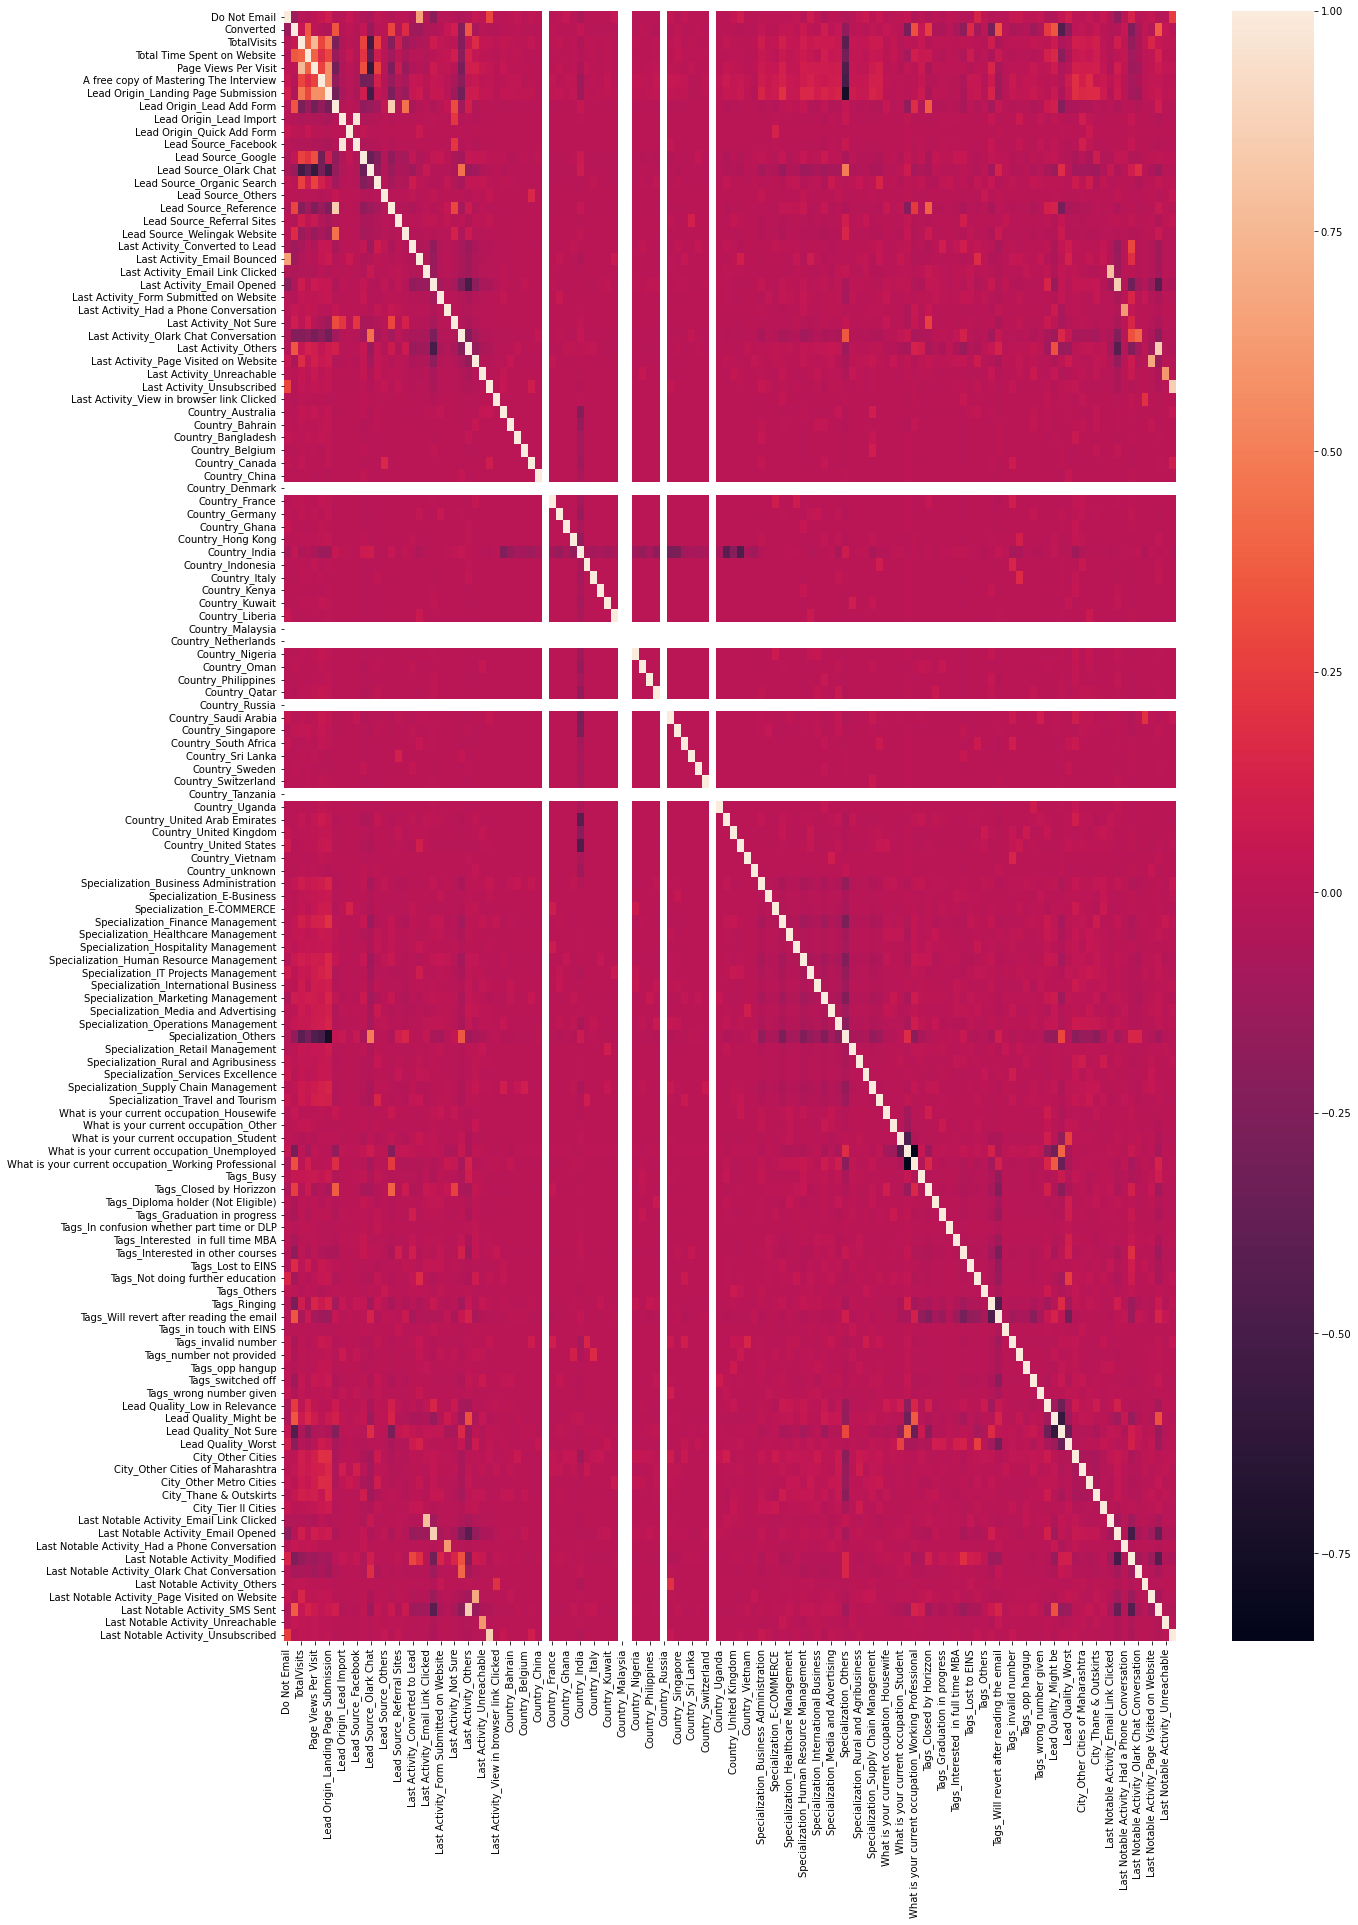

In [146]:
# Heatmap for correlation matrix
plt.figure(figsize=(20,30))
sns.heatmap(xdf1_train.corr())
plt.show()

### _Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE___

In [147]:
### Checking the Conversion Rate percentage

converted = (sum(xdf_d1['Converted'])/len(xdf_d1['Converted'].index))*100
converted

38.391519760341055

We have around 38% conversion rate. This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. So we'll not have to do any special treatment for this dataset.

# 2. Model building and evaluation

### Dividing into X and y sets for the model building

- Trained Target Variable (Dependent Variable) - y 
- Trained Feature(s) Variable (Independent Variables)- X

In [148]:
#Divide the data into X and y
y_train = xdf1_train.pop("Converted")
X_train = xdf1_train

print(y_train.shape)
print(X_train.shape)

(6075,)
(6075, 127)


# Building Initial Training Model - 0

In [149]:
import statsmodels.api as sm

In [150]:
# Logistic regression model with StatsModels
logmd0 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logmd0.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     5952
Model Family:                Binomial   Df Model:                          122
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1181.2
Date:                Tue, 18 Oct 2022   Deviance:                       2362.5
Time:                        20:10:50   Pearson chi2:                 4.46e+04
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   20.4523   1.13e+05      0.000      1.000   -2.22e+05    2.22e+05
Do Not Email                                            -1.0611      0.335     -3.165      0.002      -1.718      -0.404
TotalVisits                                              0.9581      0.389      2.460      0.014       0.195       1.721
Total Time Spent on Website                              4.2314      0.268     15.811      0.000       3.707       4.756
Page Views Per Visit                                    -1.0690      0.360     -2.971      0.003      -1.774      -0.364
A free copy of Mastering The Interview                  -0.1581      0.189     -0.837      0.403      -0.528       0.212
Lead Origin_Landing Page Submission                     -0.7495      0.233     -3.223      0.001      -1.205      -0.294
Lead Origin_Lead Add Form                                2.2717      0.734      3.093      0.002       0.832       3.711
Lead Origin_Lead Import                                 24.0657   5.41e+04      0.000      1.000   -1.06e+05    1.06e+05
Lead Origin_Quick Add Form                              26.2163   3.01e+05    8.7e-05      1.000    -5.9e+05     5.9e+05
Lead Source_Facebook                                   -24.0725   5.41e+04     -0.000      1.000   -1.06e+05    1.06e+05
Lead Source_Google                                       0.0511      0.197      0.259      0.796      -0.335       0.438
Lead Source_Olark Chat                                   0.8427      0.262      3.221      0.001       0.330       1.355
Lead Source_Organic Search                               0.2390      0.230      1.040      0.298      -0.211       0.689
Lead Source_Others                                      -0.4430      1.005     -0.441      0.659      -2.413       1.527
Lead Source_Reference                                   -0.9413      0.842     -1.118      0.264      -2.592       0.709
Lead Source_Referral Sites                               0.1276      0.472      0.271      0.787      -0.797       1.052
Lead Source_Welingak Website                             3.6620      1.273      2.877      0.004       1.167       6.157
Last Activity_Converted to Lead                        -24.7028   1.13e+05     -0.000      1.000   -2.22e+05    2.22e+05
Last Activity_Email Bounced                            -25.3524   1.13e+05     -0.000      1.000   -2.22e+05    2.22e+05
Last Activity_Email Link Clicked                       -24.3154   1.13e+05     -0.000      1.000   -2.22e+05    2.22e+05
Last Activity_Email Opened                             -24.5557   1.13e+05     -0.000      1.000   -2.22e+05    2.22e+05
Last Activity_Form Submitted on Website                -24

As we can see from above we have got pretty significant variables here. We will perform Feature elimination

## Feature Selection (Predictor Variables) - Using RFE (Recursive Feature Elimination)

- we will use RFE (Recursive Feature Elimination) method to which will provide us with set of variables ranked in an 
  order of importance (of impacting outcome)

In [151]:
#RFE - Selecting 20 Variables using RFE
from sklearn.feature_selection import RFE
logm = LogisticRegression()
logm.fit(X_train, y_train)
rfe = RFE(logm,n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [152]:
#Creating dataframe for rfe ranked variables

rfe_train_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_train_df.sort_values(by='Ranking')

Predictor  Select Status  Ranking
0                                         Do Not Email           True        1
124                     Last Notable Activity_SMS Sent           True        1
111                                 Lead Quality_Worst           True        1
110                              Lead Quality_Not Sure           True        1
107                            Tags_wrong number given           True        1
106                                  Tags_switched off           True        1
104                           Tags_number not provided           True        1
103                                Tags_invalid number           True        1
101           Tags_Will revert after reading the email           True        1
100                                       Tags_Ringing           True        1
98                    Tags_Not doing further education           True        1
97                                   Tags_Lost to EINS           True        1
96                    Tags_Interested in other courses           True        1
91                             Tags_Closed by Horizzon           True        1
90                                           Tags_Busy           True        1
24               Last Activity_Olark Chat Conversation           True        1
126                 Last Notable Activity_Unsubscribed           True        1
6                            Lead Origin_Lead Add Form           True        1
16                        Lead Source_Welingak Website           True        1
2                          Total Time Spent on Website           True        1
89   What is your current occupation_Working Profes...          False        2
54                                Country_Saudi Arabia          False        3
11                              Lead Source_Olark Chat          False        4
109                              Lead Quality_Might be          False        5
117           Last Notable Activity_Email Link Clicked          False        6
121      Last Notable Activity_Olark Chat Conversation          False        7
120                     Last Notable Activity_Modified          False        8
25                                Last Activity_Others          False        9
38                                     Country_Germany          False       10
3                                 Page Views Per Visit          False       11
1                                          TotalVisits          False       12
94          Tags_In confusion whether part time or DLP          False       13
52                                       Country_Qatar          False       14
92                  Tags_Diploma holder (Not Eligible)          False       15
43                                       Country_Italy          False       16
119     Last Notable Activity_Had a Phone Conversation          False       17
116                                City_Tier II Cities          False       18
5                  Lead Origin_Landing Page Submission          False       19
79                               Specialization_Others          False       20
105                                    Tags_opp hangup          False       21
27                           Last Activity_Unreachable          False       22
86               What is your current occupation_Other          False       23
14                               Lead Source_Reference          False       24
22              Last Activity_Had a Phone Conversation          False       25
63                              Country_United Kingdom          False       26
55                                   Country_Singapore          False       27
64                               Country_United States          False       28
41                                       Country_India          False       29
62                        Country_United Arab Emirates          False       30
95                   Tags_Interested  in full time MBA          False       31
77              

In [153]:
#Seperating Columns as per RFE_Support = TRUE & FALSE
rfe_col_true=X_train.columns[rfe.support_]
print(rfe_col_true)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')


In [154]:
#rfe support false 
rfe_col_false=X_train.columns[~rfe.support_]
rfe_col_false

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search',
       ...
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object', length=107)

In [155]:
#Creating Independent Variable with Features selected by using RFE 
X_train_rfe=X_train[rfe_col_true]
X_train_rfe.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
5182             0                     0.024412                          0   
8469             1                     0.082113                          0   
8382             0                     0.619174                          0   
8031             0                     0.191300                          0   
6712             0                     0.923657                          1   

      Lead Source_Welingak Website  Last Activity_Olark Chat Conversation  \
5182                             0                                      0   
8469                             0                                      0   
8382                             0                                      0   
8031                             0                                      0   
6712                             0                                      0   

      Tags_Busy  Tags_Closed by Horizzon  Tags_Interested in other courses  \
5182          0                        0                                 0   
8469          0                        0                                 0   
8382          0                        0                                 0   
8031          0                        0                                 0   
6712          0                        1                                 0   

      Tags_Lost to EINS  Tags_Not doing further education  Tags_Ringing  \
5182                  0                                 0             0   
8469                  0                                 0             0   
8382                  0                                 0             1   
8031                  0                                 0             0   
6712                  0                                 0             0   

      Tags_Will revert after reading the email  Tags_invalid number  \
5182                                         0                    0   
8469                                         0                    0   
8382                                         0                    0   
8031                                         0                    0   
6712                                         0                    0   

      Tags_number not provided  Tags_switched off  Tags_wrong number given  \
5182                         0                  0                        0   
8469                         0                  0                        0   
8382                         0                  0                        0   
8031                         0                  0                        0   
6712                         0                  0                        0   

      Lead Quality_Not Sure  Lead Quality_Worst  \
5182                      0                   1   
8469                      1                   0   
8382                      1                   0   
8031                      0                   0   
6712                      1                   0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unsubscribed  
5182                               0                                   0  
8469                               0                                   0  
8382                               0                                   0  
8031                               0                                   0  
6712                               0                                   0

### Creating functions to perform Model building & Evaluation

In [156]:
import statsmodels.api as sm

# Function for building the model
def build_model(X,y):
    X_sm = sm.add_constant(X)    # To add a constant
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()    # To fit the model
    print(logm.summary())    # Summary of the model  
    return X_sm, logm



### Calculating VIF:-
- Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are 
correlated with each other. It is an extremely important parameter to test our linear model. The formula for 
calculating VIF is: VIF>5 is unacceptable

In [157]:
# Function to calculate Variance Inflation Factor (VIF)

def vif_calculator(df):
    vif=pd.DataFrame()
    vif["Feature"]=df.columns
    vif["VIF"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["VIF"]=round(vif["VIF"],2)
    vif=vif.sort_values(by="VIF", ascending=False)
    vif=vif.reset_index(drop=True)
    return vif

In [158]:
# Function to get predicted values on train set

def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [159]:
from sklearn import metrics

# Function to get confusion matrix and accuracy

def confusion_metric(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [160]:
# Function for calculating metric beyond accuracy

def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate - predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

# Building Model 1

In [161]:
#Model 1
X1, logmd1 = build_model(X_train_rfe,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6054
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1317.2
Date:                Tue, 18 Oct 2022   Deviance:                       2634.4
Time:                        20:11:02   Pearson chi2:                 2.05e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

- Tags_invalid number has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

In [162]:
#Checking VIF

vif_calculator(X_train_rfe)

Feature   VIF
0   Tags_Will revert after reading the email  3.90
1                      Lead Quality_Not Sure  3.37
2                Total Time Spent on Website  1.97
3                  Lead Origin_Lead Add Form  1.80
4                               Tags_Ringing  1.75
5             Last Notable Activity_SMS Sent  1.56
6                    Tags_Closed by Horizzon  1.40
7               Lead Source_Welingak Website  1.33
8      Last Activity_Olark Chat Conversation  1.28
9           Tags_Interested in other courses  1.24
10                              Do Not Email  1.21
11                        Lead Quality_Worst  1.19
12                                 Tags_Busy  1.17
13                         Tags_switched off  1.14
14          Tags_Not doing further education  1.12
15                         Tags_Lost to EINS  1.11
16        Last Notable Activity_Unsubscribed  1.08
17                       Tags_invalid number  1.05
18                  Tags_number not provided  1.02
19                   Tags_wrong number given  1.02

- Clearly there is not much multicollinearity present in our model among the selected features as per their VIF values <5.

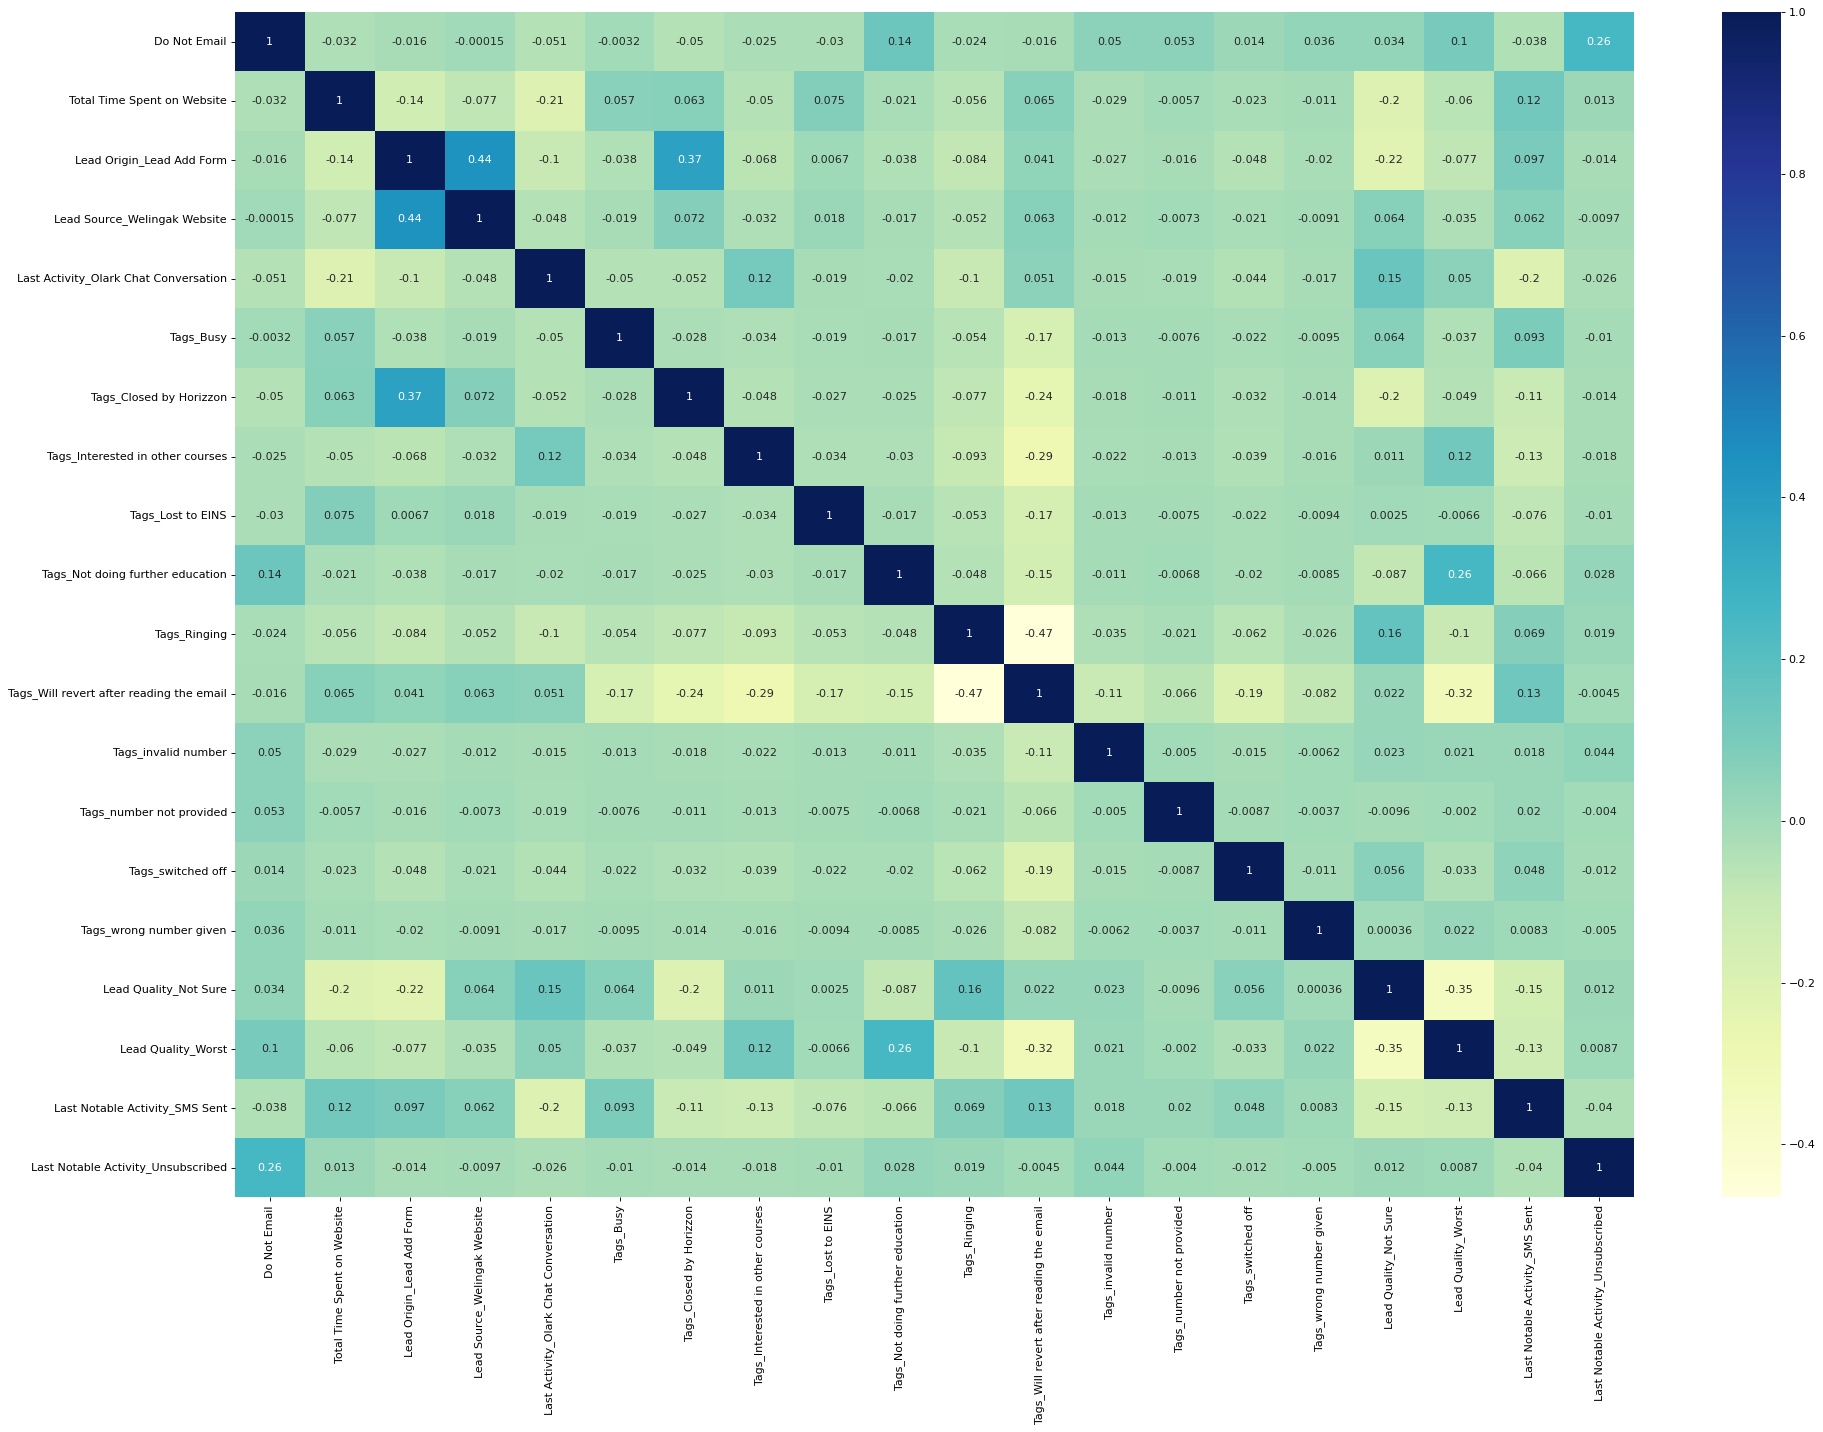

In [163]:
#Let us now check the correlation among the features in the below heat map

plt.figure(figsize=(25,18), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train_rfe.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Evaluation For Model 1

In [164]:
# To get predicted values on train set
y_train_pred_final1 = get_pred(X1,logmd1)
y_train_pred_final1.head()

Converted  Converted_prob  Lead ID  predicted
0          0        0.003191     5182          0
1          0        0.001868     8469          0
2          0        0.004712     8382          0
3          0        0.220127     8031          0
4          1        0.998061     6712          1

In [165]:
# Confusion Matrix and accuracy
confusion1 = confusion_metric(y_train_pred_final1["Converted"],y_train_pred_final1["predicted"])

Confusion Matrix:
[[3575  181]
 [ 295 2024]]
Training Accuracy:  0.9216460905349795


In [166]:
#Metrics beyond simply Accuracy

other_metrics(confusion1)

Sensitivity:  0.8727899956877965
Specificity:  0.9518104366347178
False postive rate - predicting the lead conversion when the lead does not convert:  0.04818956336528221
Positive predictive value:  0.9179138321995465
Negative predictive value:  0.9237726098191215


# Building Model 2

In [167]:
#Removing feature - "Tags_invalid number" due high P Value
X_train_rfe_2=X_train_rfe.drop("Tags_invalid number",axis=1)
X_train_rfe_2.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
5182             0                     0.024412                          0   
8469             1                     0.082113                          0   
8382             0                     0.619174                          0   
8031             0                     0.191300                          0   
6712             0                     0.923657                          1   

      Lead Source_Welingak Website  Last Activity_Olark Chat Conversation  \
5182                             0                                      0   
8469                             0                                      0   
8382                             0                                      0   
8031                             0                                      0   
6712                             0                                      0   

      Tags_Busy  Tags_Closed by Horizzon  Tags_Interested in other courses  \
5182          0                        0                                 0   
8469          0                        0                                 0   
8382          0                        0                                 0   
8031          0                        0                                 0   
6712          0                        1                                 0   

      Tags_Lost to EINS  Tags_Not doing further education  Tags_Ringing  \
5182                  0                                 0             0   
8469                  0                                 0             0   
8382                  0                                 0             1   
8031                  0                                 0             0   
6712                  0                                 0             0   

      Tags_Will revert after reading the email  Tags_number not provided  \
5182                                         0                         0   
8469                                         0                         0   
8382                                         0                         0   
8031                                         0                         0   
6712                                         0                         0   

      Tags_switched off  Tags_wrong number given  Lead Quality_Not Sure  \
5182                  0                        0                      0   
8469                  0                        0                      1   
8382                  0                        0                      1   
8031                  0                        0                      0   
6712                  0                        0                      1   

      Lead Quality_Worst  Last Notable Activity_SMS Sent  \
5182                   1                               0   
8469                   0                               0   
8382                   0                               0   
8031                   0                               0   
6712                   0                               0   

      Last Notable Activity_Unsubscribed  
5182                                   0  
8469                                   0  
8382                                   0  
8031                                   0  
6712                                   0

In [168]:
#Building Model 2 
X2, logmd2 = build_model(X_train_rfe_2,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6055
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1323.4
Date:                Tue, 18 Oct 2022   Deviance:                       2646.8
Time:                        20:11:03   Pearson chi2:                 2.00e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

- "Tags_Not doing further education" has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

In [169]:
#Checking VIF

vif_calculator(X_train_rfe_2)

Feature   VIF
0   Tags_Will revert after reading the email  3.80
1                      Lead Quality_Not Sure  3.28
2                Total Time Spent on Website  1.96
3                  Lead Origin_Lead Add Form  1.80
4                               Tags_Ringing  1.72
5             Last Notable Activity_SMS Sent  1.55
6                    Tags_Closed by Horizzon  1.39
7               Lead Source_Welingak Website  1.33
8      Last Activity_Olark Chat Conversation  1.28
9           Tags_Interested in other courses  1.23
10                              Do Not Email  1.21
11                        Lead Quality_Worst  1.19
12                                 Tags_Busy  1.16
13                         Tags_switched off  1.14
14          Tags_Not doing further education  1.12
15                         Tags_Lost to EINS  1.10
16        Last Notable Activity_Unsubscribed  1.08
17                   Tags_wrong number given  1.02
18                  Tags_number not provided  1.02

### Evaluation For Model 2

In [170]:
# To get predicted values on train set
y_train_pred_final2 = get_pred(X2,logmd2)
y_train_pred_final2.head()

Converted  Converted_prob  Lead ID  predicted
0          0        0.002716     5182          0
1          0        0.001404     8469          0
2          0        0.004904     8382          0
3          0        0.172170     8031          0
4          1        0.998076     6712          1

In [171]:
# Confusion Matrix and accuracy
confusion2 = confusion_metric(y_train_pred_final2["Converted"],y_train_pred_final2["predicted"])

Confusion Matrix:
[[3571  185]
 [ 295 2024]]
Training Accuracy:  0.9209876543209876


In [172]:
#Metrics beyond simply Accuracy

other_metrics(confusion2)

Sensitivity:  0.8727899956877965
Specificity:  0.9507454739084132
False postive rate - predicting the lead conversion when the lead does not convert:  0.049254526091586794
Positive predictive value:  0.9162516976007243
Negative predictive value:  0.9236937403000517


# Building Model 3

   - After Removing Feature "Tags_Not doing further education" has a very high p-value > 0.05

In [173]:
#Removing feature - "Tags_Not doing further education" due high P Value
X_train_rfe_3=X_train_rfe_2.drop("Tags_Not doing further education",axis=1)
X_train_rfe_3.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
5182             0                     0.024412                          0   
8469             1                     0.082113                          0   
8382             0                     0.619174                          0   
8031             0                     0.191300                          0   
6712             0                     0.923657                          1   

      Lead Source_Welingak Website  Last Activity_Olark Chat Conversation  \
5182                             0                                      0   
8469                             0                                      0   
8382                             0                                      0   
8031                             0                                      0   
6712                             0                                      0   

      Tags_Busy  Tags_Closed by Horizzon  Tags_Interested in other courses  \
5182          0                        0                                 0   
8469          0                        0                                 0   
8382          0                        0                                 0   
8031          0                        0                                 0   
6712          0                        1                                 0   

      Tags_Lost to EINS  Tags_Ringing  \
5182                  0             0   
8469                  0             0   
8382                  0             1   
8031                  0             0   
6712                  0             0   

      Tags_Will revert after reading the email  Tags_number not provided  \
5182                                         0                         0   
8469                                         0                         0   
8382                                         0                         0   
8031                                         0                         0   
6712                                         0                         0   

      Tags_switched off  Tags_wrong number given  Lead Quality_Not Sure  \
5182                  0                        0                      0   
8469                  0                        0                      1   
8382                  0                        0                      1   
8031                  0                        0                      0   
6712                  0                        0                      1   

      Lead Quality_Worst  Last Notable Activity_SMS Sent  \
5182                   1                               0   
8469                   0                               0   
8382                   0                               0   
8031                   0                               0   
6712                   0                               0   

      Last Notable Activity_Unsubscribed  
5182                                   0  
8469                                   0  
8382                                   0  
8031                                   0  
6712                                   0

In [174]:
#Building Model 3 
X3, logmd3 = build_model(X_train_rfe_3,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6056
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1326.0
Date:                Tue, 18 Oct 2022   Deviance:                       2652.0
Time:                        20:11:04   Pearson chi2:                 2.02e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

- "Tags_wrong number given" has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

In [175]:
#Checking VIF need to be <5

vif_calculator(X_train_rfe_3)

Feature   VIF
0   Tags_Will revert after reading the email  3.76
1                      Lead Quality_Not Sure  3.24
2                Total Time Spent on Website  1.95
3                  Lead Origin_Lead Add Form  1.80
4                               Tags_Ringing  1.71
5             Last Notable Activity_SMS Sent  1.54
6                    Tags_Closed by Horizzon  1.39
7               Lead Source_Welingak Website  1.33
8      Last Activity_Olark Chat Conversation  1.28
9           Tags_Interested in other courses  1.22
10                              Do Not Email  1.19
11                                 Tags_Busy  1.16
12                         Tags_switched off  1.14
13                        Lead Quality_Worst  1.11
14                         Tags_Lost to EINS  1.10
15        Last Notable Activity_Unsubscribed  1.08
16                   Tags_wrong number given  1.02
17                  Tags_number not provided  1.01

### Evaluation For Model 3

In [176]:
# To get predicted values on train set
y_train_pred_final3 = get_pred(X3,logmd3)
y_train_pred_final3.head()

Converted  Converted_prob  Lead ID  predicted
0          0        0.002307     5182          0
1          0        0.001177     8469          0
2          0        0.004892     8382          0
3          0        0.147423     8031          0
4          1        0.998075     6712          1

In [177]:
# Confusion Matrix and accuracy
confusion3 = confusion_metric(y_train_pred_final3["Converted"],y_train_pred_final3["predicted"])

Confusion Matrix:
[[3571  185]
 [ 296 2023]]
Training Accuracy:  0.9208230452674897


In [178]:
#Metrics beyond simply Accuracy

other_metrics(confusion3)

Sensitivity:  0.8723587753341958
Specificity:  0.9507454739084132
False postive rate - predicting the lead conversion when the lead does not convert:  0.049254526091586794
Positive predictive value:  0.916213768115942
Negative predictive value:  0.9234548745797776


# Building Model 4

- After Removing Feature "Tags_wrong number given" has a very high p-value > 0.05

In [179]:
#Removing feature - "Tags_wrong number given" due high P Value
X_train_rfe_4=X_train_rfe_3.drop("Tags_wrong number given",axis=1)
X_train_rfe_4.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
5182             0                     0.024412                          0   
8469             1                     0.082113                          0   
8382             0                     0.619174                          0   
8031             0                     0.191300                          0   
6712             0                     0.923657                          1   

      Lead Source_Welingak Website  Last Activity_Olark Chat Conversation  \
5182                             0                                      0   
8469                             0                                      0   
8382                             0                                      0   
8031                             0                                      0   
6712                             0                                      0   

      Tags_Busy  Tags_Closed by Horizzon  Tags_Interested in other courses  \
5182          0                        0                                 0   
8469          0                        0                                 0   
8382          0                        0                                 0   
8031          0                        0                                 0   
6712          0                        1                                 0   

      Tags_Lost to EINS  Tags_Ringing  \
5182                  0             0   
8469                  0             0   
8382                  0             1   
8031                  0             0   
6712                  0             0   

      Tags_Will revert after reading the email  Tags_number not provided  \
5182                                         0                         0   
8469                                         0                         0   
8382                                         0                         0   
8031                                         0                         0   
6712                                         0                         0   

      Tags_switched off  Lead Quality_Not Sure  Lead Quality_Worst  \
5182                  0                      0                   1   
8469                  0                      1                   0   
8382                  0                      1                   0   
8031                  0                      0                   0   
6712                  0                      1                   0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unsubscribed  
5182                               0                                   0  
8469                               0                                   0  
8382                               0                                   0  
8031                               0                                   0  
6712                               0                                   0

In [180]:
#Building Model 4
X4, logmd4 = build_model(X_train_rfe_4,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6057
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1328.7
Date:                Tue, 18 Oct 2022   Deviance:                       2657.4
Time:                        20:11:04   Pearson chi2:                 2.01e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

- "Tags_number not provided" has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

In [181]:
#Checking VIF need to be <5

vif_calculator(X_train_rfe_4)

Feature   VIF
0   Tags_Will revert after reading the email  3.72
1                      Lead Quality_Not Sure  3.21
2                Total Time Spent on Website  1.95
3                  Lead Origin_Lead Add Form  1.80
4                               Tags_Ringing  1.70
5             Last Notable Activity_SMS Sent  1.54
6                    Tags_Closed by Horizzon  1.39
7               Lead Source_Welingak Website  1.33
8      Last Activity_Olark Chat Conversation  1.28
9           Tags_Interested in other courses  1.21
10                              Do Not Email  1.19
11                                 Tags_Busy  1.16
12                         Tags_switched off  1.13
13                        Lead Quality_Worst  1.11
14                         Tags_Lost to EINS  1.10
15        Last Notable Activity_Unsubscribed  1.08
16                  Tags_number not provided  1.01

### Evaluation For Model 4

In [182]:
# To get predicted values on train set
y_train_pred_final4 = get_pred(X4,logmd4)
y_train_pred_final4.head()

Converted  Converted_prob  Lead ID  predicted
0          0        0.002135     5182          0
1          0        0.001001     8469          0
2          0        0.004929     8382          0
3          0        0.127587     8031          0
4          1        0.998061     6712          1

In [183]:
# Confusion Matrix and accuracy
confusion4 = confusion_metric(y_train_pred_final4["Converted"],y_train_pred_final4["predicted"])

Confusion Matrix:
[[3572  184]
 [ 296 2023]]
Training Accuracy:  0.9209876543209876


In [184]:
#Metrics beyond simply Accuracy

other_metrics(confusion4)

Sensitivity:  0.8723587753341958
Specificity:  0.9510117145899893
False postive rate - predicting the lead conversion when the lead does not convert:  0.04898828541001065
Positive predictive value:  0.9166289080199366
Negative predictive value:  0.9234746639089969


# Building Model 5

- After Removing Feature "Tags_number not provided" has a very high p-value > 0.05

In [185]:
#Removing feature - "Tags_number not provided" due high P Value
X_train_rfe_5=X_train_rfe_4.drop("Tags_number not provided",axis=1)
X_train_rfe_5.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
5182             0                     0.024412                          0   
8469             1                     0.082113                          0   
8382             0                     0.619174                          0   
8031             0                     0.191300                          0   
6712             0                     0.923657                          1   

      Lead Source_Welingak Website  Last Activity_Olark Chat Conversation  \
5182                             0                                      0   
8469                             0                                      0   
8382                             0                                      0   
8031                             0                                      0   
6712                             0                                      0   

      Tags_Busy  Tags_Closed by Horizzon  Tags_Interested in other courses  \
5182          0                        0                                 0   
8469          0                        0                                 0   
8382          0                        0                                 0   
8031          0                        0                                 0   
6712          0                        1                                 0   

      Tags_Lost to EINS  Tags_Ringing  \
5182                  0             0   
8469                  0             0   
8382                  0             1   
8031                  0             0   
6712                  0             0   

      Tags_Will revert after reading the email  Tags_switched off  \
5182                                         0                  0   
8469                                         0                  0   
8382                                         0                  0   
8031                                         0                  0   
6712                                         0                  0   

      Lead Quality_Not Sure  Lead Quality_Worst  \
5182                      0                   1   
8469                      1                   0   
8382                      1                   0   
8031                      0                   0   
6712                      1                   0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unsubscribed  
5182                               0                                   0  
8469                               0                                   0  
8382                               0                                   0  
8031                               0                                   0  
6712                               0                                   0

In [186]:
#Building Model 5
X5, logmd5 = build_model(X_train_rfe_5,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6058
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1332.1
Date:                Tue, 18 Oct 2022   Deviance:                       2664.2
Time:                        20:11:04   Pearson chi2:                 2.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

- "Tags_Interested in other courses" has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

In [187]:
#Checking VIF need to be <5

vif_calculator(X_train_rfe_5)

Feature   VIF
0   Tags_Will revert after reading the email  3.69
1                      Lead Quality_Not Sure  3.19
2                Total Time Spent on Website  1.94
3                  Lead Origin_Lead Add Form  1.80
4                               Tags_Ringing  1.69
5             Last Notable Activity_SMS Sent  1.53
6                    Tags_Closed by Horizzon  1.39
7               Lead Source_Welingak Website  1.33
8      Last Activity_Olark Chat Conversation  1.28
9           Tags_Interested in other courses  1.21
10                              Do Not Email  1.18
11                                 Tags_Busy  1.15
12                         Tags_switched off  1.13
13                        Lead Quality_Worst  1.11
14                         Tags_Lost to EINS  1.10
15        Last Notable Activity_Unsubscribed  1.08

### Evaluation For Model 5

In [188]:
# To get predicted values on train set
y_train_pred_final5 = get_pred(X5,logmd5)
y_train_pred_final5.head()

Converted  Converted_prob  Lead ID  predicted
0          0        0.002018     5182          0
1          0        0.000803     8469          0
2          0        0.005068     8382          0
3          0        0.105763     8031          0
4          1        0.998084     6712          1

In [189]:
# Confusion Matrix and accuracy
confusion5 = confusion_metric(y_train_pred_final5["Converted"],y_train_pred_final5["predicted"])

Confusion Matrix:
[[3571  185]
 [ 296 2023]]
Training Accuracy:  0.9208230452674897


In [190]:
#Metrics beyond simply Accuracy

other_metrics(confusion5)

Sensitivity:  0.8723587753341958
Specificity:  0.9507454739084132
False postive rate - predicting the lead conversion when the lead does not convert:  0.049254526091586794
Positive predictive value:  0.916213768115942
Negative predictive value:  0.9234548745797776


# Building Model 6
- After Removing Feature "Tags_Interested in other courses" has a very high p-value > 0.05

In [191]:
#Removing feature - "Tags_Interested in other courses" due high P Value
X_train_rfe_6=X_train_rfe_5.drop("Tags_Interested in other courses",axis=1)
X_train_rfe_6.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
5182             0                     0.024412                          0   
8469             1                     0.082113                          0   
8382             0                     0.619174                          0   
8031             0                     0.191300                          0   
6712             0                     0.923657                          1   

      Lead Source_Welingak Website  Last Activity_Olark Chat Conversation  \
5182                             0                                      0   
8469                             0                                      0   
8382                             0                                      0   
8031                             0                                      0   
6712                             0                                      0   

      Tags_Busy  Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Ringing  \
5182          0                        0                  0             0   
8469          0                        0                  0             0   
8382          0                        0                  0             1   
8031          0                        0                  0             0   
6712          0                        1                  0             0   

      Tags_Will revert after reading the email  Tags_switched off  \
5182                                         0                  0   
8469                                         0                  0   
8382                                         0                  0   
8031                                         0                  0   
6712                                         0                  0   

      Lead Quality_Not Sure  Lead Quality_Worst  \
5182                      0                   1   
8469                      1                   0   
8382                      1                   0   
8031                      0                   0   
6712                      1                   0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unsubscribed  
5182                               0                                   0  
8469                               0                                   0  
8382                               0                                   0  
8031                               0                                   0  
6712                               0                                   0

In [192]:
#Building Model 6
X6, logmd6 = build_model(X_train_rfe_6,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6059
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1332.4
Date:                Tue, 18 Oct 2022   Deviance:                       2664.7
Time:                        20:11:04   Pearson chi2:                 2.02e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [193]:
#Checking VIF need to be <5

vif_calculator(X_train_rfe_6)

Feature   VIF
0   Tags_Will revert after reading the email  3.35
1                      Lead Quality_Not Sure  2.88
2                Total Time Spent on Website  1.87
3                  Lead Origin_Lead Add Form  1.77
4                               Tags_Ringing  1.61
5             Last Notable Activity_SMS Sent  1.53
6                    Tags_Closed by Horizzon  1.38
7               Lead Source_Welingak Website  1.33
8      Last Activity_Olark Chat Conversation  1.25
9                               Do Not Email  1.18
10                                 Tags_Busy  1.14
11                         Tags_switched off  1.12
12                         Tags_Lost to EINS  1.09
13                        Lead Quality_Worst  1.09
14        Last Notable Activity_Unsubscribed  1.08

- All of the features have p-value close to zero i.e. they all seem significant.

- We also have to check VIFs (Variance Inflation Factors) of features to see if there's any multicollinearity present. looks good

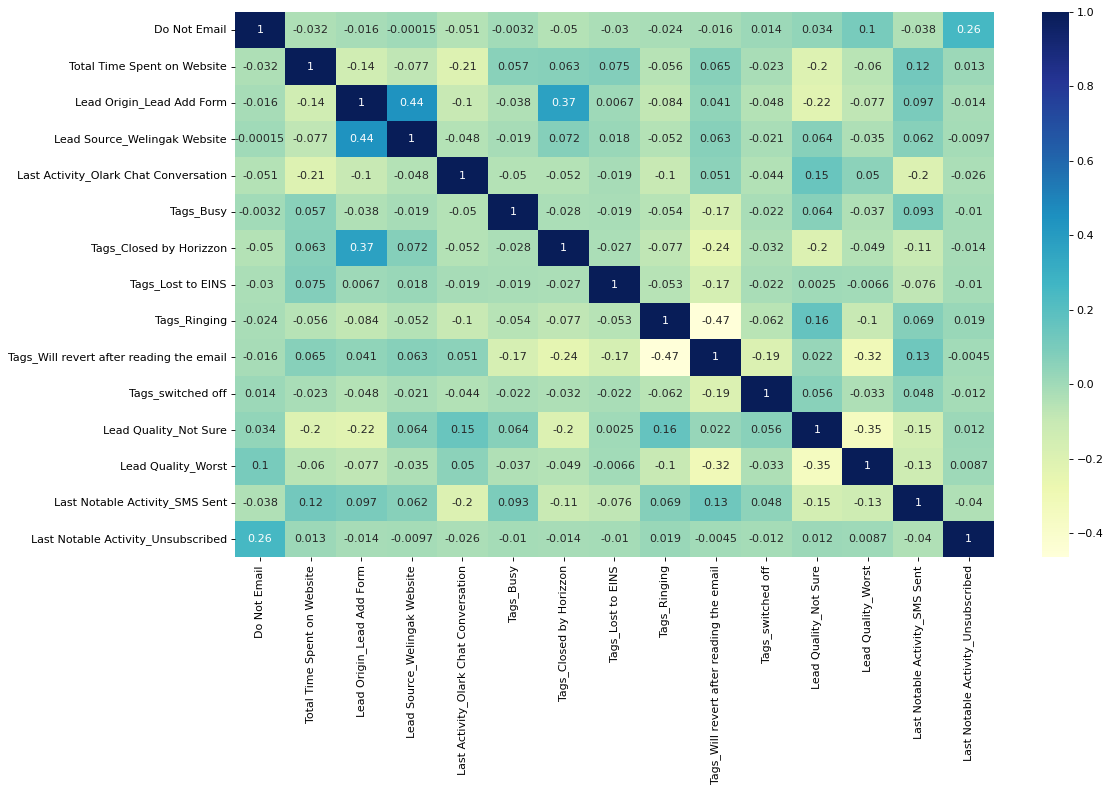

In [194]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(15,10), dpi=80, facecolor='w', edgecolor='k', frameon='True')

corr = X_train_rfe_6.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

- From VIF values and heat maps, we can see that there is not much multicollinearity present. All variables have a good value of VIF. These features seem important from the business aspect as well. So we need not drop any more variables and we can proceed with making predictions using this model only.

### Evaluation For Model 6

In [195]:
# To get predicted values on train set
y_train_pred_final6 = get_pred(X6,logmd6)
y_train_pred_final6.head()

Converted  Converted_prob  Lead ID  predicted
0          0        0.001896     5182          0
1          0        0.000710     8469          0
2          0        0.005042     8382          0
3          0        0.094129     8031          0
4          1        0.998069     6712          1

In [196]:
# Confusion Matrix and accuracy
confusion6 = confusion_metric(y_train_pred_final6["Converted"],y_train_pred_final6["predicted"])

Confusion Matrix:
[[3573  183]
 [ 296 2023]]
Training Accuracy:  0.9211522633744856


In [197]:
#Metrics beyond simply Accuracy

other_metrics(confusion6)

Sensitivity:  0.8723587753341958
Specificity:  0.9512779552715654
False postive rate - predicting the lead conversion when the lead does not convert:  0.048722044728434506
Positive predictive value:  0.9170444242973708
Negative predictive value:  0.9234944430085293


# Model selection comments:-  Final Model #6
- All variables have p-value < 0.05.
- All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.
- The overall accuracy of `0.9211`
- sensitivity of our logistic regression model Of all the conversions how well we have identified correctly.Around 87% has been identified correctly.

# Optimise Cut off - ROC Curve


An ROC curve demonstrate that:-


- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

### Plotting the ROC Curve:

In [198]:
#Function to draw ROC curve -

def draw_roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [199]:
y_train_pred_final6.head()

Converted  Converted_prob  Lead ID  predicted
0          0        0.001896     5182          0
1          0        0.000710     8469          0
2          0        0.005042     8382          0
3          0        0.094129     8031          0
4          1        0.998069     6712          1

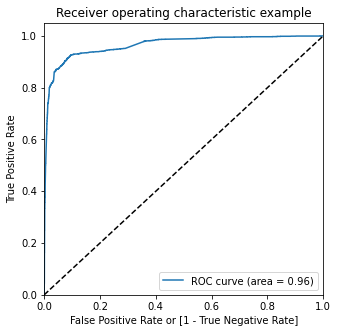

In [200]:
# To plot ROC for Model no 6
draw_roc_curve(y_train_pred_final6["Converted"], y_train_pred_final6["Converted_prob"])

In [201]:
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final6["Converted"], y_train_pred_final6["Converted_prob"]))

Area under curve:  0.9646584151572806




- The model looks good as it far away from the diagonal. 96% area is covered under the curve.

# Finding the Optimal Threshold - Cut off

- Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [202]:
y_train_pred_cut6=y_train_pred_final6
y_train_pred_cut6.head()

Converted  Converted_prob  Lead ID  predicted
0          0        0.001896     5182          0
1          0        0.000710     8469          0
2          0        0.005042     8382          0
3          0        0.094129     8031          0
4          1        0.998069     6712          1

In [203]:
#Creating columns with different probability cut offs

cuts=[float(i)/10 for i in range(0,11,1)]
for i in cuts:
    y_train_pred_cut6[i]=y_train_pred_cut6["Converted_prob"].map(lambda x: 1 if x>i else 0)
    
y_train_pred_cut6.head()

Converted  Converted_prob  Lead ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.001896     5182          0    1    0    0    0    0   
1          0        0.000710     8469          0    1    0    0    0    0   
2          0        0.005042     8382          0    1    0    0    0    0   
3          0        0.094129     8031          0    1    0    0    0    0   
4          1        0.998069     6712          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  1.0  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    1    1    1    1    1    0

In [204]:
#lets calculate accuracy, sensitivity, specificity for all cut offs

df_cutoff6=pd.DataFrame(columns=["Probability","Accuracy","Sensitivity","Specificity"])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

for i in cuts:
    cm6=metrics.confusion_matrix(y_train_pred_cut6["Converted"],y_train_pred_cut6[i])
    total=sum(sum(cm6))
    acc=(cm6[0,0]+cm6[1,1])/total
    
    sens=cm6[1,1]/(cm6[1,1]+cm6[1,0])
    spec=cm6[0,0]/(cm6[0,0]+cm6[0,1])
    
    df_cutoff6.loc[i]=[i,acc,sens,spec]

print(df_cutoff6)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.381728     1.000000     0.000000
0.1          0.1  0.770206     0.979301     0.641108
0.2          0.2  0.898601     0.931005     0.878594
0.3          0.3  0.914074     0.916343     0.912673
0.4          0.4  0.916543     0.898232     0.927849
0.5          0.5  0.921152     0.872359     0.951278
0.6          0.6  0.923951     0.860285     0.963259
0.7          0.7  0.913416     0.809401     0.977636
0.8          0.8  0.897119     0.755498     0.984558
0.9          0.9  0.866831     0.667098     0.990149
1.0          1.0  0.618272     0.000000     1.000000


## Plotting accuracy sensitivity and specificity for various probabilities.

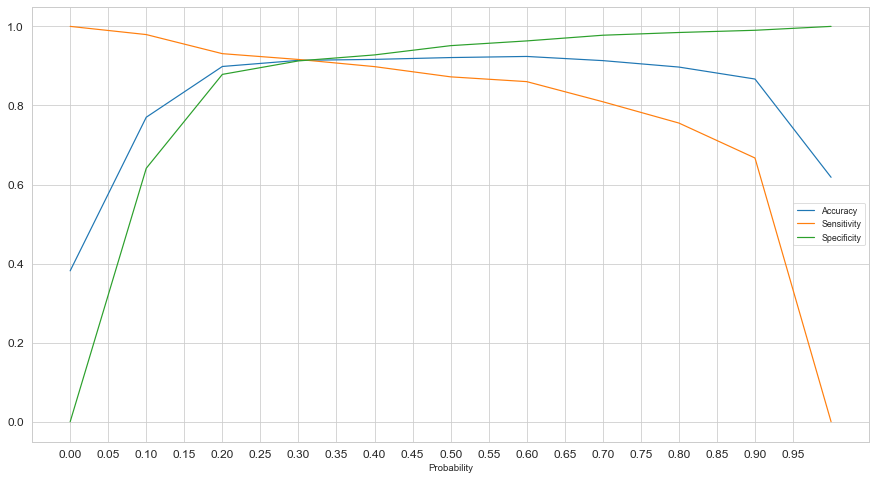

In [205]:
#Plotting Graph

sns.set_style("whitegrid") 
sns.set_context("paper") 
df_cutoff6.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'], figsize=(15,8))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

#### From the curve above,  0.32  is the optimum point to take it as a cutoff probability.

## Evaluating the model with optimal probability cutoff as 0.32

In [206]:
# From the above plot we get to know that 0.32 is the optimum point to take it as a cut-off

y_train_pred_cut6['final_predicted'] = y_train_pred_cut6["Converted_prob"].map( lambda x: 1 if x > 0.32 else 0)

y_train_pred_cut6.head()

Converted  Converted_prob  Lead ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.001896     5182          0    1    0    0    0    0   
1          0        0.000710     8469          0    1    0    0    0    0   
2          0        0.005042     8382          0    1    0    0    0    0   
3          0        0.094129     8031          0    1    0    0    0    0   
4          1        0.998069     6712          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  1.0  final_predicted  
0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0                0  
2    0    0    0    0    0    0                0  
3    0    0    0    0    0    0                0  
4    1    1    1    1    1    0                1

In [207]:
#calculate the lead score

y_train_pred_cut6['lead_score'] = y_train_pred_cut6["Converted_prob"].map(lambda x: round(x*100,3))
y_train_pred_cut6.head(10)

Converted  Converted_prob  Lead ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.001896     5182          0    1    0    0    0    0   
1          0        0.000710     8469          0    1    0    0    0    0   
2          0        0.005042     8382          0    1    0    0    0    0   
3          0        0.094129     8031          0    1    0    0    0    0   
4          1        0.998069     6712          1    1    1    1    1    1   
5          1        0.989377     6332          1    1    1    1    1    1   
6          0        0.184284      458          0    1    1    0    0    0   
7          1        0.116998     1628          0    1    1    0    0    0   
8          0        0.002103     5935          0    1    0    0    0    0   
9          0        0.000826     4201          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  1.0  final_predicted  lead_score  
0    0    0    0    0    0    0                0       0.190  
1    0    0    0    0    0    0                0       0.071  
2    0    0    0    0    0    0                0       0.504  
3    0    0    0    0    0    0                0       9.413  
4    1    1    1    1    1    0                1      99.807  
5    1    1    1    1    1    0                1      98.938  
6    0    0    0    0    0    0                0      18.428  
7    0    0    0    0    0    0                0      11.700  
8    0    0    0    0    0    0                0       0.210  
9    0    0    0    0    0    0                0       0.083

In [208]:
# Checking Confusion matrix and Overall Accuracy

confusion6 = confusion_metric(y_train_pred_cut6["Converted"],y_train_pred_cut6["final_predicted"])
confusion6_train=confusion6.copy()

Confusion Matrix:
[[3444  312]
 [ 201 2118]]
Training Accuracy:  0.9155555555555556


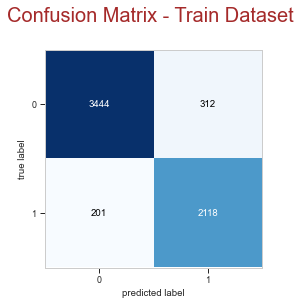

In [209]:
# To plot confusion matrix
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=confusion6_train)
plt.title("Confusion Matrix - Train Dataset \n", fontdict={'fontsize':20,'fontweight':6,'color':'brown'})
plt.show()

In [210]:
# Other metrics
other_metrics(confusion6_train)

Sensitivity:  0.9133247089262613
Specificity:  0.9169329073482428
False postive rate - predicting the lead conversion when the lead does not convert:  0.08306709265175719
Positive predictive value:  0.8716049382716049
Negative predictive value:  0.9448559670781893


#### Classification Report

In [211]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_cut6["Converted"],y_train_pred_cut6["final_predicted"]))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3756
           1       0.87      0.91      0.89      2319

    accuracy                           0.92      6075
   macro avg       0.91      0.92      0.91      6075
weighted avg       0.92      0.92      0.92      6075



- With the current cut off as 0.32 we have accuracy, sensitivity and specificity of around approx ~ 91%

# Precision and Recall

In [212]:
#Precision
#Precision = TP / TP + FP

prec=confusion6[1,1]/(confusion6[1,1]+confusion6[0,1])
prec

0.8716049382716049

In [213]:
#Recall
#Recall = TP / TP + FN

rec=confusion6[1,1]/(confusion6[1,1]+confusion6[1,0])
rec

0.9133247089262613

In [214]:
#using Sklearn
from sklearn.metrics import precision_score,recall_score

In [215]:
precision_score(y_train_pred_cut6["Converted"],y_train_pred_cut6["final_predicted"])

0.8716049382716049

In [216]:
recall_score(y_train_pred_cut6["Converted"],y_train_pred_cut6["final_predicted"])

0.9133247089262613

# Precision and Recall trade off

In [217]:
from sklearn.metrics import precision_recall_curve

In [218]:
p, r, thresholds = precision_recall_curve(y_train_pred_cut6["Converted"], y_train_pred_cut6["Converted_prob"])

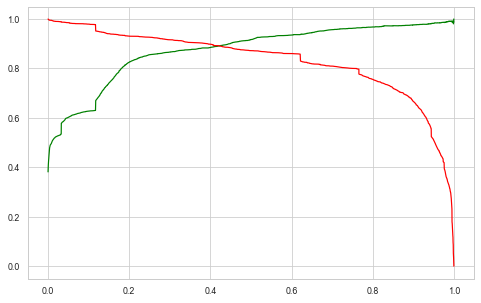

In [219]:
# To plot precision vs recall for different thresholds
plt.figure(figsize=[8,5])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- From the precision-recall graph above, we get the optical threshold value as close to 0.41.We can check our accuracy using this cutoff too.

In [220]:
# From the above plot Precision - Recall Trade off we get to know that 0.41 is the optimum point to take it as a cut-off

y_train_pred_cut6['final_predicted_PR'] = y_train_pred_cut6["Converted_prob"].map( lambda x: 1 if x > 0.41 else 0)

y_train_pred_cut6.head()

Converted  Converted_prob  Lead ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.001896     5182          0    1    0    0    0    0   
1          0        0.000710     8469          0    1    0    0    0    0   
2          0        0.005042     8382          0    1    0    0    0    0   
3          0        0.094129     8031          0    1    0    0    0    0   
4          1        0.998069     6712          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  1.0  final_predicted  lead_score  \
0    0    0    0    0    0    0                0       0.190   
1    0    0    0    0    0    0                0       0.071   
2    0    0    0    0    0    0                0       0.504   
3    0    0    0    0    0    0                0       9.413   
4    1    1    1    1    1    0                1      99.807   

   final_predicted_PR  
0                   0  
1                   0  
2                   0  
3                   0  
4                   1

In [221]:
# Checking Confusion matrix and Overall Accuracy

confusion_cut6 = confusion_metric(y_train_pred_cut6["Converted"],y_train_pred_cut6["final_predicted_PR"])

Confusion Matrix:
[[3497  259]
 [ 249 2070]]
Training Accuracy:  0.9163786008230452


In [222]:
## Other metrics
other_metrics(confusion_cut6)

Sensitivity:  0.8926261319534282
Specificity:  0.9310436634717785
False postive rate - predicting the lead conversion when the lead does not convert:  0.06895633652822152
Positive predictive value:  0.8887934735938171
Negative predictive value:  0.9335290977042179


In [223]:
#Classification report
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_cut6["Converted"],y_train_pred_cut6["final_predicted_PR"]))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3756
           1       0.89      0.89      0.89      2319

    accuracy                           0.92      6075
   macro avg       0.91      0.91      0.91      6075
weighted avg       0.92      0.92      0.92      6075



- Accuracy and other metrics yield similar values for both the cutoffs. We'll use the cutoff of 0.32 as derived earlier for predictions on the test set.

## Calculating the F1 score

F1 = 2×(Precision*Recall)/(Precision+Recall)

In [224]:
F1 = 2*(prec*rec)/(prec+rec)
F1

0.8919772583701832

# Making predictions on the Test Set

In [225]:
#Checking test dataset for testing
xdf1_test.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
475              0          1          0.0                            0   
2461             0          1          0.0                            0   
1890             0          0          2.0                          169   
6007             0          0          3.0                           94   
4052             0          0          3.0                          150   

      Page Views Per Visit  A free copy of Mastering The Interview  \
475                    0.0                                       0   
2461                   0.0                                       0   
1890                   2.0                                       0   
6007                   1.5                                       1   
4052                   3.0                                       1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
475                                     0                          1   
2461                                    0                          1   
1890                                    0                          0   
6007                                    0                          0   
4052                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
475                         0                           0   
2461                        0                           0   
1890                        0                           0   
6007                        0                           0   
4052                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
475                      0                   0                       0   
2461                     0                   0                       0   
1890                     0                   1                       0   
6007                     0                   0                       1   
4052                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
475                            0                   0                      1   
2461                           0                   0                      0   
1890                           0                   0                      0   
6007                           0                   0                      0   
4052                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
475                            0                             0   
2461                           0                             1   
1890                           0                             0   
6007                           0                             0   
4052                           0                             0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
475                                 0                            0   
2461                                0                            0   
1890                                0                            0   
6007                                0                            0   
4052                                0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
475                                  0                           1   
2461                                 0                           0   
1890                                 0                           1   
6007                                 0                           1   
4052                                 0                           0   

      Last Activity_Form Submitted on Website  \
475                                         0   
2461                                        0   
1890                        

In [226]:
#Shape of Test data set
xdf1_test.shape

(2604, 128)

In [227]:
# apllying Transform on Test dataset - Standardization
xdf1_test[numerical_features_train]= scaler.transform(xdf1_test[numerical_features_train])
xdf1_test.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
475              0          1     0.000000                     0.000000   
2461             0          1     0.000000                     0.000000   
1890             0          0     0.181818                     0.075011   
6007             0          0     0.272727                     0.041722   
4052             0          0     0.272727                     0.066578   

      Page Views Per Visit  A free copy of Mastering The Interview  \
475               0.000000                                       0   
2461              0.000000                                       0   
1890              0.333333                                       0   
6007              0.250000                                       1   
4052              0.500000                                       1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
475                                     0                          1   
2461                                    0                          1   
1890                                    0                          0   
6007                                    0                          0   
4052                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
475                         0                           0   
2461                        0                           0   
1890                        0                           0   
6007                        0                           0   
4052                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
475                      0                   0                       0   
2461                     0                   0                       0   
1890                     0                   1                       0   
6007                     0                   0                       1   
4052                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
475                            0                   0                      1   
2461                           0                   0                      0   
1890                           0                   0                      0   
6007                           0                   0                      0   
4052                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
475                            0                             0   
2461                           0                             1   
1890                           0                             0   
6007                           0                             0   
4052                           0                             0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
475                                 0                            0   
2461                                0                            0   
1890                                0                            0   
6007                                0                            0   
4052                                0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
475                                  0                           1   
2461                                 0                           0   
1890                                 0                           1   
6007                                 0                           1   
4052                                 0                           0   

      Last Activity_Form Submitted on Website  \
475                                         0   
2461                                        0   
1890                        

In [228]:
#Divide the data into X and y
y_test = xdf1_test.pop("Converted")
X_test = xdf1_test

print(y_test.shape)
print(X_test.shape)

(2604,)
(2604, 127)


In [229]:
#
features6=list(X_train_rfe_6.columns)
features6

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Source_Welingak Website',
 'Last Activity_Olark Chat Conversation',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_switched off',
 'Lead Quality_Not Sure',
 'Lead Quality_Worst',
 'Last Notable Activity_SMS Sent',
 'Last Notable Activity_Unsubscribed']

In [230]:
# To get final features
X_test_final = X_test[features6]
X_test_final.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
475              0                     0.000000                          1   
2461             0                     0.000000                          1   
1890             0                     0.075011                          0   
6007             0                     0.041722                          0   
4052             0                     0.066578                          0   

      Lead Source_Welingak Website  Last Activity_Olark Chat Conversation  \
475                              0                                      0   
2461                             1                                      0   
1890                             0                                      0   
6007                             0                                      0   
4052                             0                                      0   

      Tags_Busy  Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Ringing  \
475           0                        0                  1             0   
2461          0                        0                  0             0   
1890          0                        0                  0             0   
6007          0                        0                  0             0   
4052          0                        0                  0             1   

      Tags_Will revert after reading the email  Tags_switched off  \
475                                          0                  0   
2461                                         1                  0   
1890                                         1                  0   
6007                                         0                  0   
4052                                         0                  0   

      Lead Quality_Not Sure  Lead Quality_Worst  \
475                       0                   0   
2461                      1                   0   
1890                      1                   0   
6007                      0                   1   
4052                      1                   0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unsubscribed  
475                                0                                   0  
2461                               1                                   0  
1890                               0                                   0  
6007                               0                                   0  
4052                               1                                   0

In [231]:
# To add a constant
X_test_final_con = sm.add_constant(X_test_final)

#### Making Prediction on Test dataset using Model #6 

In [232]:
# Making predictions
y_test_pred6 = logmd6.predict(X_test_final_con)

y_test_pred6.head()

475     0.999470
2461    0.997807
1890    0.144296
6007    0.002004
4052    0.010512
dtype: float64

In [233]:
#converting y_pred to a dataframe 

y_pred_df6 = pd.DataFrame(y_test_pred6)

y_pred_df6.head()

0
475   0.999470
2461  0.997807
1890  0.144296
6007  0.002004
4052  0.010512

In [234]:
# Converting y_test to dataframe
y_test_df6 = pd.DataFrame(y_test)

In [235]:
# Putting Lead ID to index
y_test_df6['Lead ID'] = y_test_df6.index

In [236]:
# To remove index for both dataframes to append them side by side 
y_pred_df6.reset_index(drop=True, inplace=True)
y_test_df6.reset_index(drop=True, inplace=True)

In [237]:
#concat both df
y_test_pred_final6=pd.concat([y_test_df6,y_pred_df6],axis=1)
y_test_pred_final6.head()

Converted  Lead ID         0
0          1      475  0.999470
1          1     2461  0.997807
2          0     1890  0.144296
3          0     6007  0.002004
4          0     4052  0.010512

In [238]:
# To Rename the column 
y_test_pred_final6= y_test_pred_final6.rename(columns={ 0 : 'Converted_prob'})

y_test_pred_final6.head()

Converted  Lead ID  Converted_prob
0          1      475        0.999470
1          1     2461        0.997807
2          0     1890        0.144296
3          0     6007        0.002004
4          0     4052        0.010512

In [239]:
# Rearranging the columns
y_test_pred_final6 = y_test_pred_final6.reindex(['Lead ID','Converted','Converted_prob'],axis=1)
y_test_pred_final6.head()

Lead ID  Converted  Converted_prob
0      475          1        0.999470
1     2461          1        0.997807
2     1890          0        0.144296
3     6007          0        0.002004
4     4052          0        0.010512

In [240]:
y_test_pred_final6.shape

(2604, 3)

## Using the probability threshold value 0f 0.32 on the test dataset to predict if a lead will convert

In [241]:
# To put the threshold of 0.34 as derived
y_test_pred_final6['final_predicted'] = y_test_pred_final6["Converted_prob"].map(lambda x: 1 if x > 0.32 else 0)

y_test_pred_final6.head()

Lead ID  Converted  Converted_prob  final_predicted
0      475          1        0.999470                1
1     2461          1        0.997807                1
2     1890          0        0.144296                0
3     6007          0        0.002004                0
4     4052          0        0.010512                0

In [242]:
#CHECKING AUC

print("Area under curve: ", metrics.roc_auc_score(y_test_pred_final6["Converted"], y_test_pred_final6["Converted_prob"]))

Area under curve:  0.9597591461844543


In [243]:
# Confusion matrix and overall accuracy
confusion_test6 = confusion_metric(y_test_pred_final6["Converted"],y_test_pred_final6["final_predicted"])

Confusion Matrix:
[[1470  121]
 [  93  920]]
Training Accuracy:  0.9178187403993856


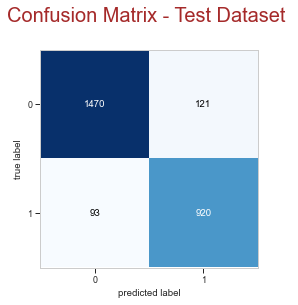

In [244]:
# To plot confusion matrix
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=confusion_test6)
plt.title("Confusion Matrix - Test Dataset \n", fontdict={'fontsize':20,'fontweight':6,'color':'brown'})
plt.show()

In [245]:
# Other metrics
other_metrics(confusion_test6)

Sensitivity:  0.9081934846989141
Specificity:  0.9239472030169704
False postive rate - predicting the lead conversion when the lead does not convert:  0.07605279698302954
Positive predictive value:  0.8837656099903939
Negative predictive value:  0.9404990403071017


### Classification Report

In [246]:
print(classification_report(y_test_pred_final6["Converted"],y_test_pred_final6["final_predicted"]))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1591
           1       0.88      0.91      0.90      1013

    accuracy                           0.92      2604
   macro avg       0.91      0.92      0.91      2604
weighted avg       0.92      0.92      0.92      2604



### Sensitivity of the prediction over test data set is 90%

# Precision and Recall metrics for the Test Dataset

In [247]:
# precision
print('precision ',precision_score(y_test_pred_final6["Converted"],y_test_pred_final6["final_predicted"]))

# recall
print('recall ',recall_score(y_test_pred_final6["Converted"],y_test_pred_final6["final_predicted"]))

precision  0.8837656099903939
recall  0.9081934846989141


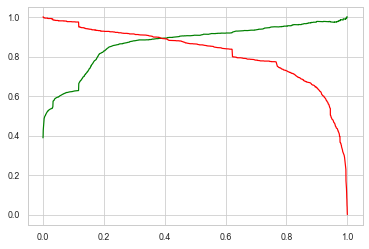

In [248]:
#Plotting Precision- Recal for Test Data set
p, r, thresholds = precision_recall_curve(y_test_pred_final6["Converted"], y_test_pred_final6["Converted_prob"])

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Comments :- 

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 91%, 90% and 92% which are approximately closer to 
  the respective values calculated using trained set.

### To avoid overfitting, let us calculate the Cross Validation Score to see how our model performs

In [249]:
from sklearn.model_selection import cross_val_score

X=X_train_rfe_6[:200]
y=y_train[:200]

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.85 0.85 0.85 0.9  0.9  0.95 0.95 0.95 0.95 0.95]
0.9099999999999999


## Plotting the ROC Curve for Test Dataset

In [250]:

fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final6["Converted"], y_test_pred_final6["Converted_prob"], drop_intermediate = False )

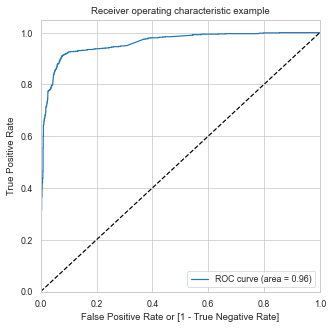

In [251]:
draw_roc_curve(y_test_pred_final6["Converted"], y_test_pred_final6["Converted_prob"])

# Assigning Lead score for the entire dataset

- Lead Score = 100 * ConversionProbability
- This needs to be calculated for all the leads from the original dataset (train + test)

In [252]:
# select & Copy test dataset
lead_test_pred = y_test_pred_final6.copy()
lead_test_pred.head()

Lead ID  Converted  Converted_prob  final_predicted
0      475          1        0.999470                1
1     2461          1        0.997807                1
2     1890          0        0.144296                0
3     6007          0        0.002004                0
4     4052          0        0.010512                0

In [253]:
# select & Copy train dataset
lead_train_pred = y_train_pred_cut6.copy()
lead_train_pred.head()

Converted  Converted_prob  Lead ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.001896     5182          0    1    0    0    0    0   
1          0        0.000710     8469          0    1    0    0    0    0   
2          0        0.005042     8382          0    1    0    0    0    0   
3          0        0.094129     8031          0    1    0    0    0    0   
4          1        0.998069     6712          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  1.0  final_predicted  lead_score  \
0    0    0    0    0    0    0                0       0.190   
1    0    0    0    0    0    0                0       0.071   
2    0    0    0    0    0    0                0       0.504   
3    0    0    0    0    0    0                0       9.413   
4    1    1    1    1    1    0                1      99.807   

   final_predicted_PR  
0                   0  
1                   0  
2                   0  
3                   0  
4                   1

In [254]:
# To drop unnecessary columns from train set
lead_train_pred = lead_train_pred[['Lead ID','Converted','Converted_prob','final_predicted']]
lead_train_pred.head()

Lead ID  Converted  Converted_prob  final_predicted
0     5182          0        0.001896                0
1     8469          0        0.000710                0
2     8382          0        0.005042                0
3     8031          0        0.094129                0
4     6712          1        0.998069                1

In [255]:
# To concatenate 2 datasets
lead_consolidated_pred = lead_train_pred.append(lead_test_pred)
lead_consolidated_pred.head()

Lead ID  Converted  Converted_prob  final_predicted
0     5182          0        0.001896                0
1     8469          0        0.000710                0
2     8382          0        0.005042                0
3     8031          0        0.094129                0
4     6712          1        0.998069                1

In [256]:
# To inspect the shape of the final dataset
print("Train Dataset = ",lead_train_pred.shape)
print("Test Dataset = ",lead_test_pred.shape)
print("Consolidated Dataset = ",lead_consolidated_pred.shape)

Train Dataset =  (6075, 4)
Test Dataset =  (2604, 4)
Consolidated Dataset =  (8679, 4)


In [257]:
# To ensure uniqueness of Lead IDs
len(lead_consolidated_pred['Lead ID'].unique().tolist())

8679

In [258]:
# To calculate the Lead Score
lead_consolidated_pred['Lead_Score'] = lead_consolidated_pred['Converted_prob'].apply(lambda x : round(x*100,3))
lead_consolidated_pred.head()

Lead ID  Converted  Converted_prob  final_predicted  Lead_Score
0     5182          0        0.001896                0       0.190
1     8469          0        0.000710                0       0.071
2     8382          0        0.005042                0       0.504
3     8031          0        0.094129                0       9.413
4     6712          1        0.998069                1      99.807

In [259]:
# To make the Lead ID column as index
lead_consolidated_pred = lead_consolidated_pred.set_index('Lead ID').sort_index(axis = 0, ascending = True)
lead_consolidated_pred.head()

Converted  Converted_prob  final_predicted  Lead_Score
Lead ID                                                        
0                0        0.053195                0       5.319
1                0        0.001808                0       0.181
2                1        0.966801                1      96.680
3                0        0.001069                0       0.107
4                1        0.961695                1      96.169

In [260]:
# To get Lead Number column from original data
leads_no = xdf_orignal[["Lead Number"]]
leads_no.head()

Lead Number
0       660737
1       660728
2       660727
3       660719
4       660681

In [261]:
# concatenate the 2 dataframes based on index
all_lead_score = pd.concat([leads_no, lead_consolidated_pred], axis=1)
all_lead_score.head()

Lead Number  Converted  Converted_prob  final_predicted  Lead_Score
0       660737        0.0        0.053195              0.0       5.319
1       660728        0.0        0.001808              0.0       0.181
2       660727        1.0        0.966801              1.0      96.680
3       660719        0.0        0.001069              0.0       0.107
4       660681        1.0        0.961695              1.0      96.169

In [262]:
# Inspecting the dataframe shape
all_lead_score.shape

(9240, 5)

In [263]:
# Inspectin if the final dataframe has any null values

total = pd.DataFrame(all_lead_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(all_lead_score.isnull().sum()/all_lead_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

Total  Percentage
Converted          561        6.07
Converted_prob     561        6.07
final_predicted    561        6.07
Lead_Score         561        6.07
Lead Number          0        0.00

## Determining Feature Importance

In [264]:
# Selecting the coefficients of the selected features from our final model excluding the intercept

pd.options.display.float_format = '{:.2f}'.format
new_params = logmd6.params[1:]
new_params

Do Not Email                               -1.43
Total Time Spent on Website                 3.21
Lead Origin_Lead Add Form                   1.64
Lead Source_Welingak Website                3.98
Last Activity_Olark Chat Conversation      -1.37
Tags_Busy                                   3.81
Tags_Closed by Horizzon                     7.72
Tags_Lost to EINS                           8.78
Tags_Ringing                               -1.19
Tags_Will revert after reading the email    4.06
Tags_switched off                          -2.08
Lead Quality_Not Sure                      -3.21
Lead Quality_Worst                         -3.47
Last Notable Activity_SMS Sent              2.52
Last Notable Activity_Unsubscribed          1.99
dtype: float64

In [265]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                               -16.26
Total Time Spent on Website                 36.61
Lead Origin_Lead Add Form                   18.70
Lead Source_Welingak Website                45.36
Last Activity_Olark Chat Conversation      -15.63
Tags_Busy                                   43.39
Tags_Closed by Horizzon                     87.96
Tags_Lost to EINS                          100.00
Tags_Ringing                               -13.54
Tags_Will revert after reading the email    46.30
Tags_switched off                          -23.71
Lead Quality_Not Sure                      -36.53
Lead Quality_Worst                         -39.47
Last Notable Activity_SMS Sent              28.66
Last Notable Activity_Unsubscribed          22.71
dtype: float64

In [266]:
# To sort features based on importance
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                12
Total Time Spent on Website                 11
Lead Origin_Lead Add Form                   10
Lead Source_Welingak Website                 0
Last Activity_Olark Chat Conversation        4
Tags_Busy                                    8
Tags_Closed by Horizzon                      2
Tags_Lost to EINS                           14
Tags_Ringing                                13
Tags_Will revert after reading the email     1
Tags_switched off                            5
Lead Quality_Not Sure                        3
Lead Quality_Worst                           9
Last Notable Activity_SMS Sent               6
Last Notable Activity_Unsubscribed           7
dtype: int64

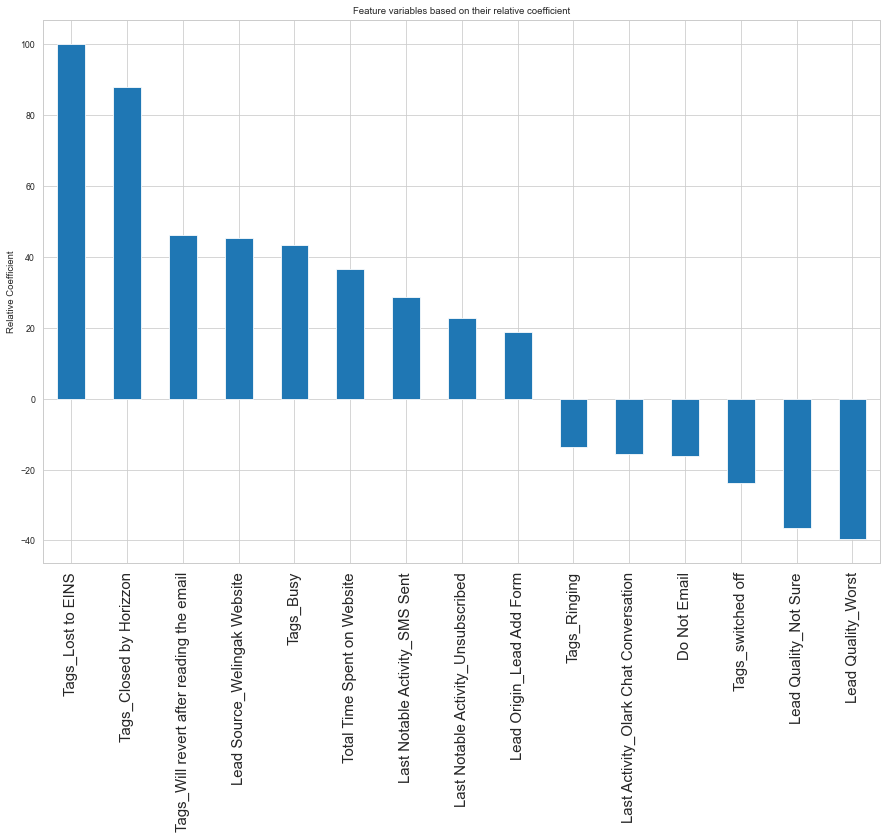

In [267]:
# Plot showing the feature variables based on their relative coefficient values
plt.figure(figsize = (15,10))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature variables based on their relative coefficient')
plt.ylabel('Relative Coefficient')
plt.xticks(fontsize=15)
plt.show()

In [268]:
# Selecting Top 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

index      0
7                         Tags_Lost to EINS 100.00
6                   Tags_Closed by Horizzon  87.96
9  Tags_Will revert after reading the email  46.30

In [269]:
# Selecting Least 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).tail(3)

index      0
10      Tags_switched off -23.71
11  Lead Quality_Not Sure -36.53
12     Lead Quality_Worst -39.47

# Conclusion

#### After trying several models, we finally chose a model no 6 (logmd6) with the following characteristics:

- All variables have p-value < `0.05`.
- All the features have very low VIF values, meaning, there is `hardly any muliticollinearity` among the features. This is also evident from the heat map.
- The overall accuracy of `0.915` at a probability threshold of 0.32 on the test dataset is also very acceptable.

- For Train Dataset 


    - Accuracy:  0.9155555555555556
    - Sensitivity:  0.9133247089262613
    - Specificity:  0.9169329073482428
    - False postive rate - predicting the lead conversion when the lead does not convert:  0.08306709265175719
    - Positive predictive value:  0.8716049382716049
    - Negative predictive value:  0.9448559670781893
    
    
    
- For Test Dataset


    - Accuracy:     0.9178187403993856
    - Sensitivity:  0.9081934846989141
    - Specificity:  0.9239472030169704
    - False postive rate - predicting the lead conversion when the lead does not convert:  0.07605279698302954
    - Positive predictive value:  0.8837656099903939
    - Negative predictive value:  0.9404990403071017
    
    
    
    
    
- The optimal threshold for the model is 0.32 which is calculated based on tradeoff between sensitivity, specificity and accuracy. According to business needs, this threshold can be changed to increase or decrease a specific metric.


- High sensitivity ensures that most of the leads who are likely to convert are correctly predicted, while high specificity ensures that most of the leads who are not likely to convert are correctly predicted.

##### Twelve features were selected as the most significant in predicting the conversion:

- Features having positive impact on conversion probability in decreasing order of impact:

- Features with Positive Coefficient Values


    - Tags_Lost to EINS
    - Tags_Closed by Horizzon
    - Tags_Will revert after reading the email
    - Lead Source_Welingak Website
    - Tags_Busy
    - Total Time Spent on Website
    - Last Notable Activity_SMS Sent
    - Last Notable Activity_Unsubscribed 
    - Lead Origin_Lead Add Form
    
    

- Features having negative impact on conversion probability in decreasing order of impact:

- Features with Negative Coefficient Values


    - Lead Quality_Worst
    - Lead Quality_Not Sure
    - Tags_switched off
    - Do Not Email
    - Last Activity_Olark Chat Conversation
    - Tags_Ringing

# Submitted By :- 


- Vaibhav Singh (princevaibz@gmail.com )
  
 
- Prashant Singh (Pr.singh013@gmail.com)

# Thank You